# Machine learning project: CKD Using Effective Classification Algorithms and RFE Techniques

## Data Preparation 

### Importing libraries 

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

### Importing our dataset 

In [5]:
names=['Age', 'Blood_Pressure', 'Specific_Gravity', 'albumin', 'Sugar',
       'Red_Blood_Cells', 'Cell_Pussy', 'Puss_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'ckd']

In [6]:
#load dataset
df=pd.read_csv(r'C:/Users/khalil/Downloads/Nouveau dossier/chronic_kidney_disease.csv', na_values=["?"],names=names)

# Understanding our dataset 

In [7]:
#description of the data in the DataFrame
df.describe()

,Age,Blood_Pressure,Specific_Gravity,albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
#View The column labels of the DataFrame
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'albumin', 'Sugar',
       'Red_Blood_Cells', 'Cell_Pussy', 'Puss_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'ckd'],
      dtype='object')

In [9]:
#The shape of a DataFrame
df.shape

(400, 25)

In [10]:
#returning the data type of each column
df.dtypes

Age                        float64
Blood_Pressure             float64
Specific_Gravity           float64
albumin                    float64
Sugar                      float64
Red_Blood_Cells             object
Cell_Pussy                  object
Puss_Cell_Clumps            object
Bacteria                    object
Blood_Glucose_Random       float64
Blood_Urea                 float64
Serum_Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed_Cell_Volume          object
White_Blood_Cell_Count      object
Red_Blood_Cell_Count        object
Hypertension                object
Diabetes_Mellitus           object
Coronary_Artery_Disease     object
Appetite                    object
Pedal_Edema                 object
Anemia                      object
ckd                         object
dtype: object

In [11]:
categorical_features=[]
categorical_features = [feat for feat in df.columns if df[feat].dtype=='object']
numerical_features=[]
numerical_features = [feat for feat in df.columns if df[feat].dtype=='float64']

C:\Users\khalil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\khalil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


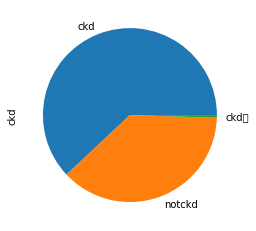

In [12]:
df['ckd'].value_counts().plot.pie()
plt.show()

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


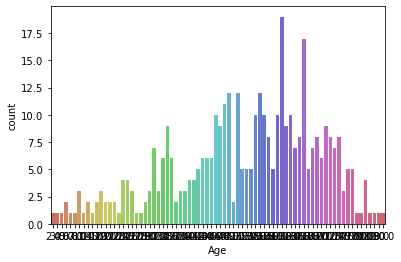

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


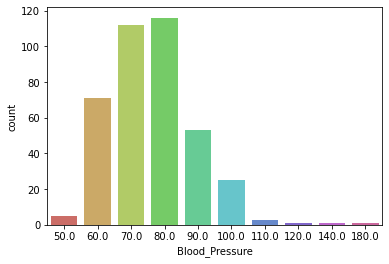

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


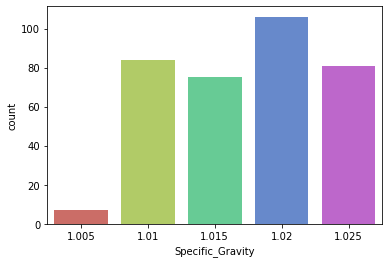

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


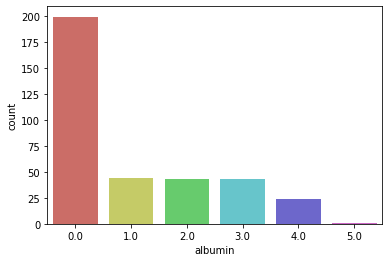

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


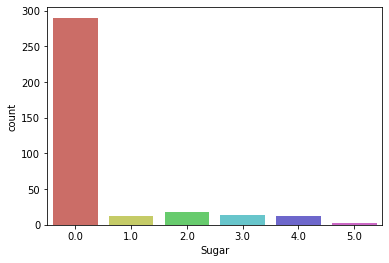

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


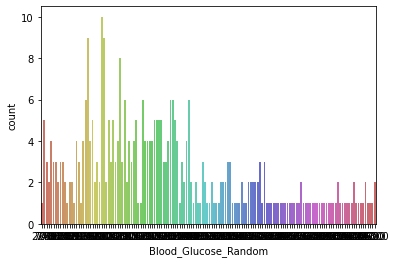

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


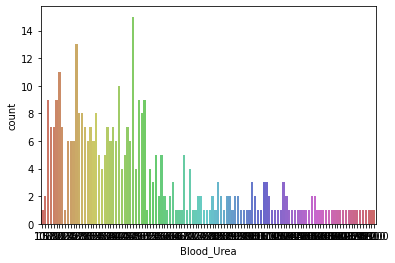

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


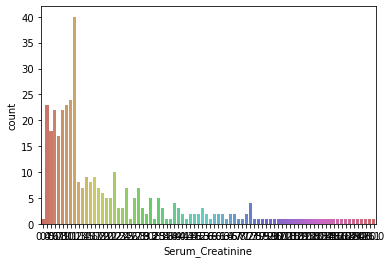

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


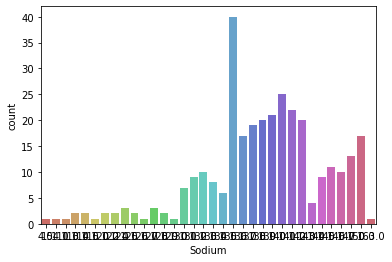

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


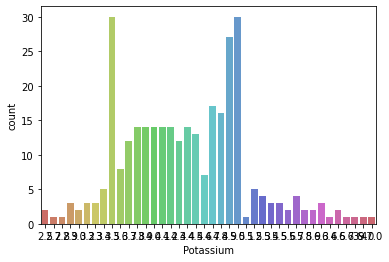

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


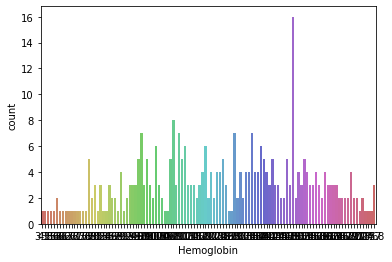

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\khalil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


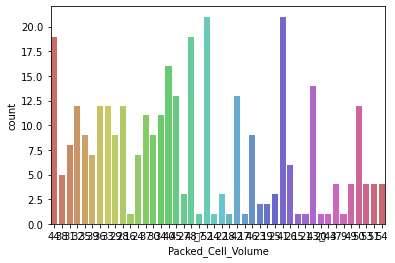

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\khalil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


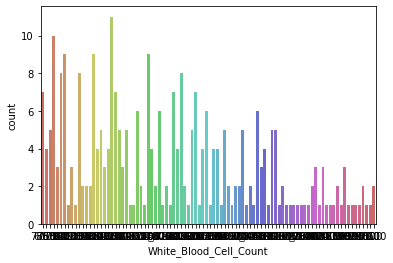

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\khalil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


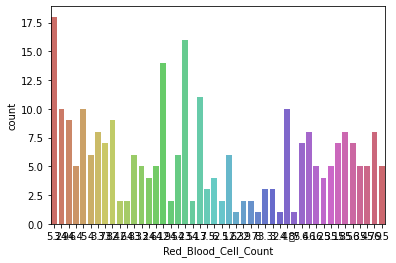

In [13]:
import seaborn as sns

for i in ['Age','Blood_Pressure','Specific_Gravity','albumin','Sugar','Blood_Glucose_Random','Blood_Urea','Serum_Creatinine','Sodium','Potassium','Hemoglobin','Packed_Cell_Volume','White_Blood_Cell_Count','Red_Blood_Cell_Count']:
    sns.countplot(df[i], palette='hls')
    plt.xlabel(i)
    plt.show()

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khalil\anaconda3\li

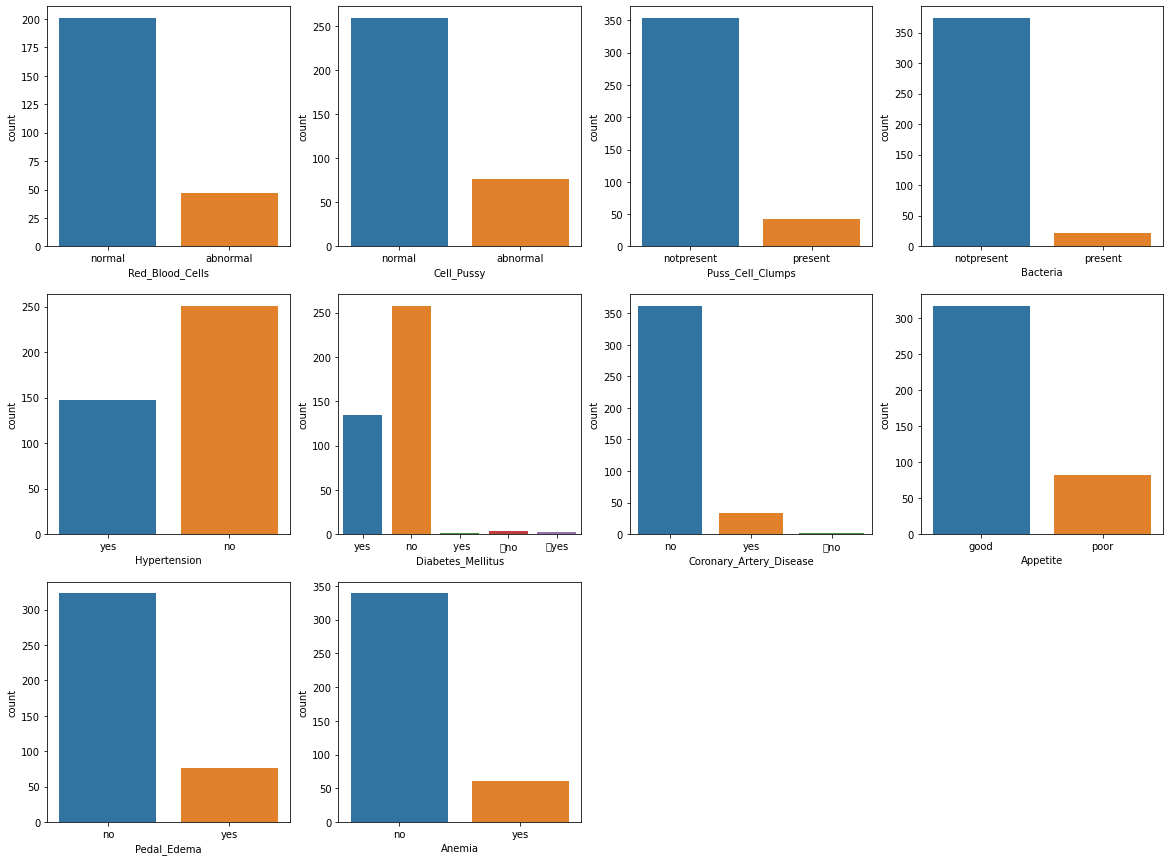

In [14]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for i in ['Red_Blood_Cells','Cell_Pussy','Puss_Cell_Clumps','Bacteria','Hypertension','Diabetes_Mellitus','Coronary_Artery_Disease','Appetite','Pedal_Edema','Anemia']:
    ax = plt.subplot(3, 4, plotnumber)
    sns.countplot(df[i])
    plotnumber +=1
    plt.xlabel(i)
plt.show()   

In [15]:
#returning the number of missing values 
df.isna().sum().sum()

1009

In [16]:
#returning the number of missing values in each column
df.isna().sum()

Age                          9
Blood_Pressure              12
Specific_Gravity            47
albumin                     46
Sugar                       49
Red_Blood_Cells            152
Cell_Pussy                  65
Puss_Cell_Clumps             4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed_Cell_Volume          70
White_Blood_Cell_Count     105
Red_Blood_Cell_Count       130
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
ckd                          0
dtype: int64

Text(0.5, 1.0, 'Missing Values Presence')

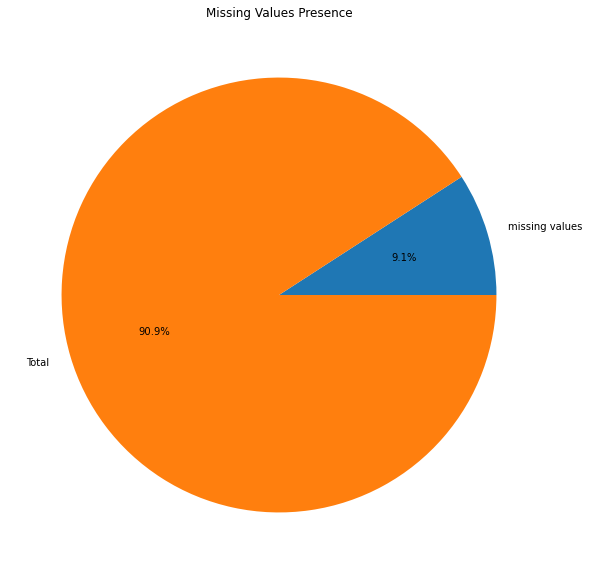

In [17]:
#Making a pie chart
total=[1006,10000]
labs=['missing values','Total']
plt.figure(figsize=(10,10))

plt.pie(total,labels=labs,autopct='%0.1f%%')
plt.title('Missing Values Presence')

<AxesSubplot:>

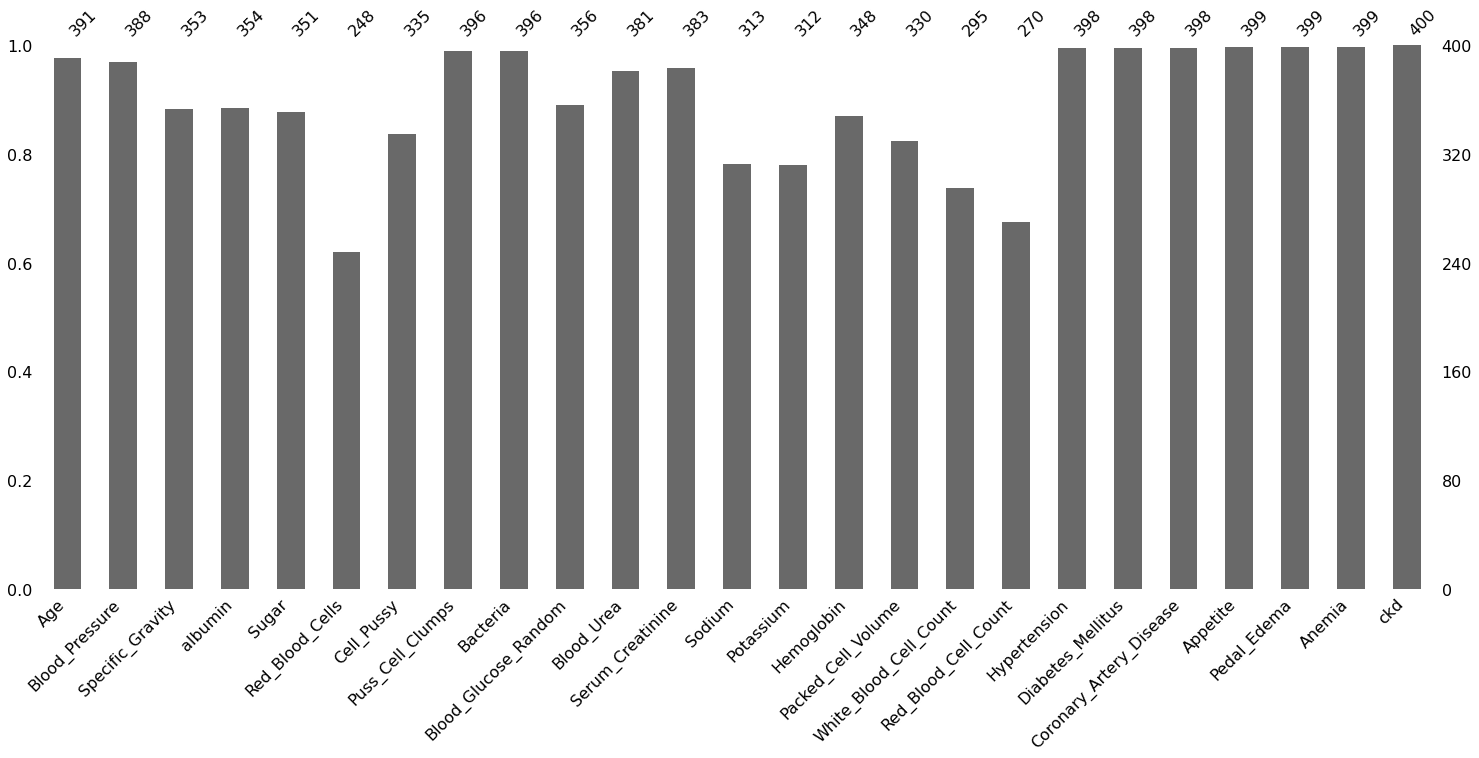

In [18]:
# Gives a bar chart of the missing values
msno.bar(df)

top 3 missing values by columns
Red_Blood_Cells 151(37% of total)
Red_Blood_Cell_Count 130 (32% of total)
White_Blood_Cell_Count 105 (26% of total)

<AxesSubplot:>

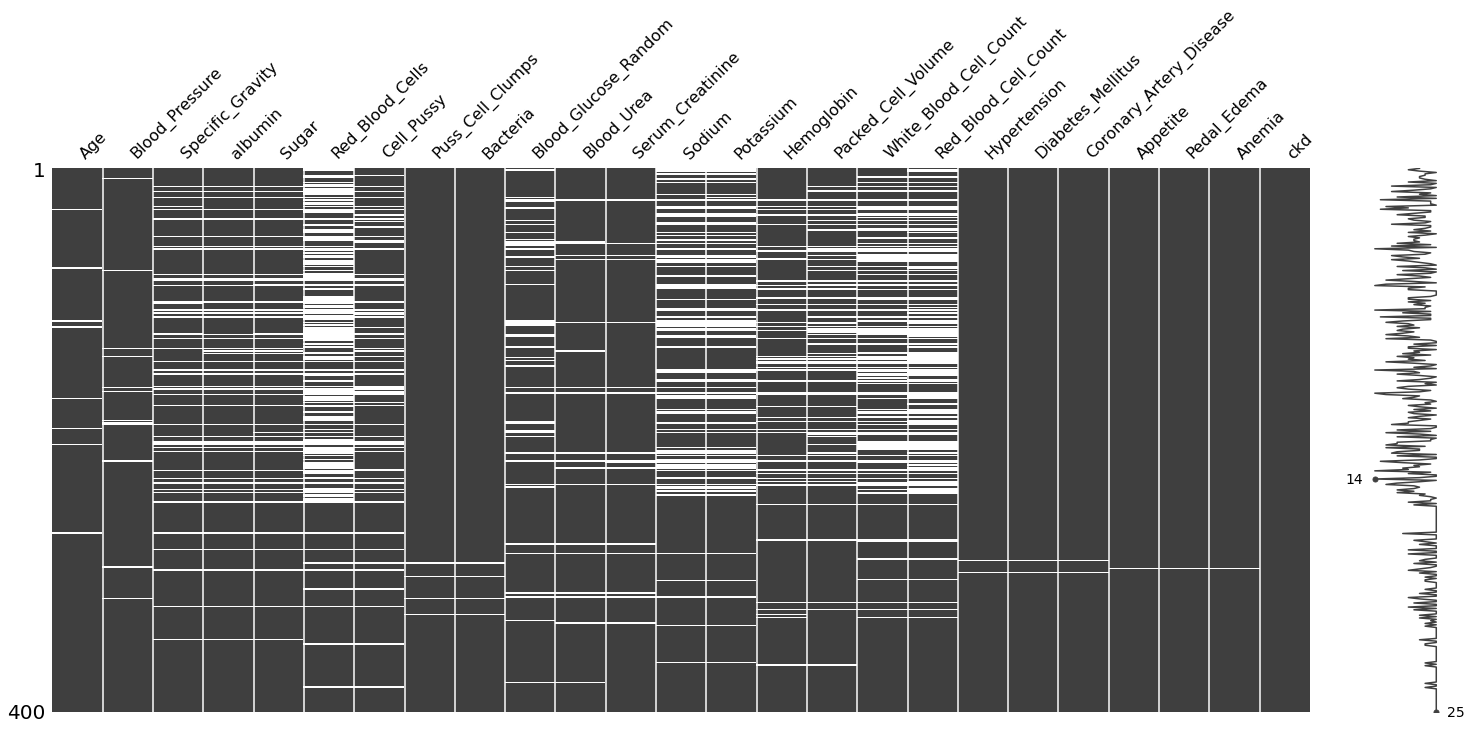

In [19]:
# Gives positional information of the missing values
msno.matrix(df)

In [20]:
# the unique values of each feature
for ft in df.columns:
    print(ft," ",df[ft].unique())

Age   [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
Blood_Pressure   [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
Specific_Gravity   [1.02  1.01  1.005 1.015   nan 1.025]
albumin   [ 1.  4.  2.  3.  0. nan  5.]
Sugar   [ 0.  3.  4.  1. nan  2.  5.]
Red_Blood_Cells   [nan 'normal' 'abnormal']
Cell_Pussy   ['normal' 'abnormal' nan]
Puss_Cell_Clumps   ['notpresent' 'present' nan]
Bacteria   ['notpresent' 'present' nan]
Blood_Glucose_Random   [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102

In [21]:
# Note that X must transform to float
# All categorical features are nominal with some outliers 

In [22]:
# Transform Packed_Cell_Volume type : string ==>float
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].str.replace('\t?','')
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].str.replace('?','40')
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].str.replace('\t43','43')
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].astype(float)

<ipython-input-22-166acd939478>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].str.replace('\t?','')
<ipython-input-22-166acd939478>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].str.replace('?','40')


In [23]:
df['White_Blood_Cell_Count'].mode()

0    9800
dtype: object

In [24]:
df['Red_Blood_Cell_Count'].mode()

0    5.2
dtype: object

In [25]:
df['White_Blood_Cell_Count'] = df['White_Blood_Cell_Count'].str.replace('\t','')
df['White_Blood_Cell_Count'] = df['White_Blood_Cell_Count'].str.replace('?','9800')
df['White_Blood_Cell_Count'] = df['White_Blood_Cell_Count'].astype(float)

<ipython-input-25-b8085aff8b9f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['White_Blood_Cell_Count'] = df['White_Blood_Cell_Count'].str.replace('?','9800')


In [26]:
df['Red_Blood_Cell_Count'] = df['Red_Blood_Cell_Count'].str.replace('?','5.2')
df['Red_Blood_Cell_Count'] = df['Red_Blood_Cell_Count'].str.replace('\t','')
df['Red_Blood_Cell_Count'] = df['Red_Blood_Cell_Count'].astype(float)

<ipython-input-26-93ebfddc3977>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Red_Blood_Cell_Count'] = df['Red_Blood_Cell_Count'].str.replace('?','5.2')


## categorical outliers

In [27]:
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].str.replace('\tno','no')
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].str.replace('\tyes','yes')
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].str.replace(' yes','yes')

In [28]:
df['ckd'] = df['ckd'].str.replace('ckd\t','ckd')

In [29]:
df['Coronary_Artery_Disease'] = df['Coronary_Artery_Disease'].str.replace('\tno','no')


In [30]:
categorical_features=[]
categorical_features = [feat for feat in df.columns if df[feat].dtype=='object']
numerical_features=[]
numerical_features = [feat for feat in df.columns if df[feat].dtype=='float64']
categorical_features

['Red_Blood_Cells',
 'Cell_Pussy',
 'Puss_Cell_Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes_Mellitus',
 'Coronary_Artery_Disease',
 'Appetite',
 'Pedal_Edema',
 'Anemia',
 'ckd']

## Encoding categorical features

In [31]:
for ft in categorical_features:
    df[ft] = df[ft].astype('category')
    df[ft] = df[ft].cat.codes
    print(ft," ",df[ft].unique())
    

Red_Blood_Cells   [-1  1  0]
Cell_Pussy   [ 1  0 -1]
Puss_Cell_Clumps   [ 0  1 -1]
Bacteria   [ 0  1 -1]
Hypertension   [ 1  0 -1]
Diabetes_Mellitus   [ 1  0 -1]
Coronary_Artery_Disease   [ 0  1 -1]
Appetite   [ 0  1 -1]
Pedal_Edema   [ 0  1 -1]
Anemia   [ 0  1 -1]
ckd   [0 1]


## Missing value imputation

### numerical features

In [32]:
# filling the numerical missing values with mean
for ft in numerical_features:
    df[ft] = df[ft].fillna(df[ft].mean())

### categorical features

In [33]:
# filling the categorical missing values with mode
for ft in categorical_features:
    df[ft] = np.where(df[ft]==-1, df[ft].mode(), df[ft])

In [34]:
df.isna().sum()

Age                        0
Blood_Pressure             0
Specific_Gravity           0
albumin                    0
Sugar                      0
Red_Blood_Cells            0
Cell_Pussy                 0
Puss_Cell_Clumps           0
Bacteria                   0
Blood_Glucose_Random       0
Blood_Urea                 0
Serum_Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed_Cell_Volume         0
White_Blood_Cell_Count     0
Red_Blood_Cell_Count       0
Hypertension               0
Diabetes_Mellitus          0
Coronary_Artery_Disease    0
Appetite                   0
Pedal_Edema                0
Anemia                     0
ckd                        0
dtype: int64

In [35]:
for ft in df.columns:
    print(ft," ",df[ft].unique())

Age   [48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.48337596 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.          5.         74.         38.         58.
 71.         34.         17.         12.         43.         41.
 57.          8.         39.         66.         81.         14.
 27.         83.         30.          4.          3.          6.
 32.         80.         49.         90.         78.         19.
  2.         33.         36.         37.         23.         25.
 20.         29.         28.         22.         79.        ]
Blood_Pressure   [ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         140.         180.
 120.      

# Outliers

### Detecting outliers 

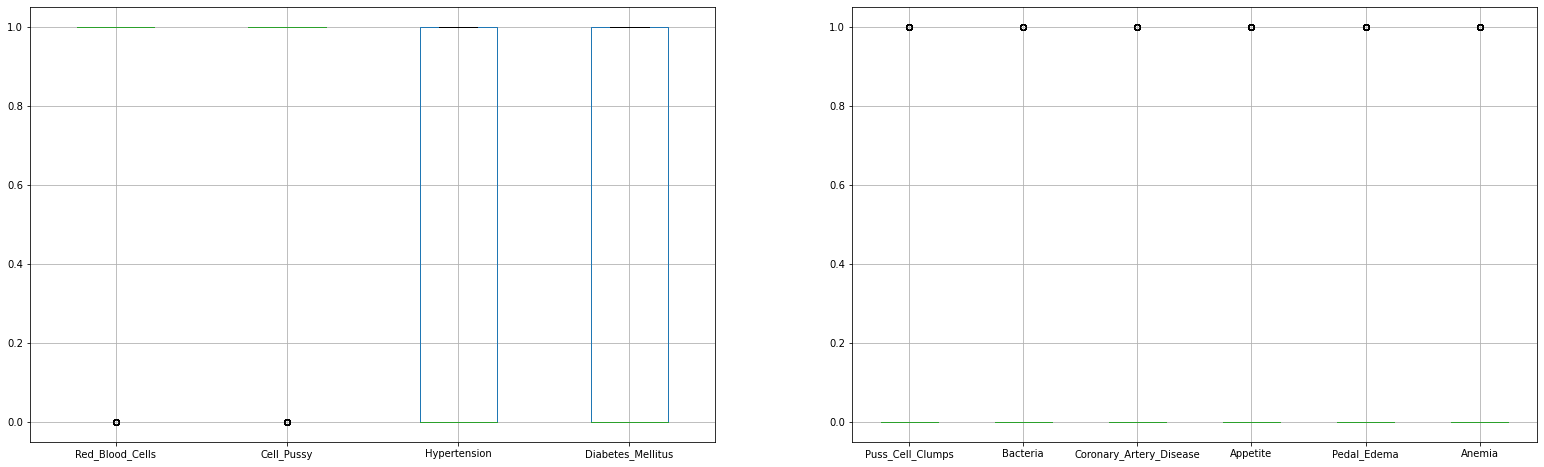

In [36]:
plt.figure(figsize=(27,8))
 
plt.subplot(1, 2, 1)
df.boxplot(column = ['Red_Blood_Cells' ,'Cell_Pussy','Hypertension','Diabetes_Mellitus'])

plt.subplot(1, 2, 2)
df.boxplot(column = ['Puss_Cell_Clumps' , 'Bacteria','Coronary_Artery_Disease','Appetite' ,'Pedal_Edema' ,'Anemia'])

plt.show()


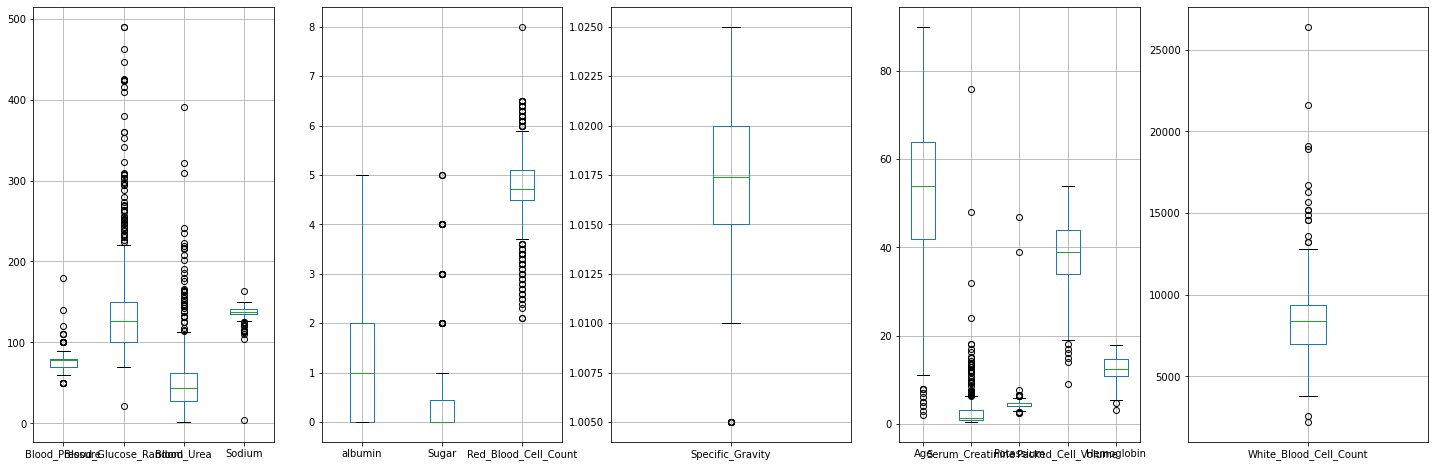

In [37]:
plt.figure(figsize=(25,8))

plt.subplot(1, 5, 1)

df.boxplot(column = ['Blood_Pressure','Blood_Glucose_Random','Blood_Urea','Sodium'])
 
plt.subplot(1, 5, 2)
df.boxplot(column = ['albumin','Sugar','Red_Blood_Cell_Count'])
plt.subplot(1, 5, 3)
df.boxplot(column = ['Specific_Gravity'])

plt.subplot(1, 5, 4)
df.boxplot(column = ['Age','Serum_Creatinine','Potassium','Packed_Cell_Volume','Hemoglobin' ])

plt.subplot(1, 5, 5)
df.boxplot(column = ['White_Blood_Cell_Count'])

plt.show()

In [38]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [39]:
def outliers_medical(df,ft,lower_bound,upper_bound): 
    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [40]:
index_list=[]
for ft in numerical_features:
    index_list.extend(outliers(df,ft))
len(index_list)

371

In [41]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'albumin', 'Sugar',
       'Red_Blood_Cells', 'Cell_Pussy', 'Puss_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'ckd'],
      dtype='object')

In [42]:
df1=df.copy()

In [43]:
outlier_val=[]
index_list=[]
index_list.extend(outliers(df,'Specific_Gravity'))
outlier_val.append(len(index_list))
for i in index_list :
    print(df1.loc[i,'Specific_Gravity'])
    df1['Specific_Gravity']=df1['Specific_Gravity'].replace(df1.loc[i,'Specific_Gravity'],np.nan)
   
len(index_list)

1.005
nan
nan
nan
nan
nan
nan


7

In [44]:
for i in index_list :
    print(df1.loc[i,'Specific_Gravity'])
    df1['Specific_Gravity']=df1['Specific_Gravity'].replace(df1.loc[i,'Specific_Gravity'],np.nan)
print(index_list)
print(df1.loc[i,'Specific_Gravity'])


nan
nan
nan
nan
nan
nan
nan
[3, 29, 48, 55, 76, 87, 154]
nan


In [45]:
df1['Specific_Gravity'].isna().sum()

7

In [46]:
index_list=[]
index_list.extend(outliers_medical(df,'Blood_Pressure',60,120))
outlier_val.append(len(index_list))

for i in index_list :
    print(df1.loc[i,'Blood_Pressure'])
    df1['Blood_Pressure']=df1['Blood_Pressure'].replace(df1.loc[i,'Blood_Pressure'],np.nan)
len(index_list)

50.0
140.0
180.0
nan
nan
nan
nan


7

In [212]:
index_list=[]
index_list.extend(outliers_medical(df,'albumin',3.4,5))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'albumin'])
    df1['albumin']=df1['albumin'].replace(df1.loc[i,'albumin'],np.nan)
len(index_list)

375

In [213]:
index_list=[]
index_list.extend(outliers_medical(df,'Sugar',2.8,6.12))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Sugar'])
    df1['Sugar']=df1['Sugar'].replace(df1.loc[i,'Sugar'],np.nan)
len(index_list)

370

In [214]:
index_list=[]
index_list.extend(outliers_medical(df,'Blood_Glucose_Random',100,300))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Blood_Glucose_Random'])
    df1['Blood_Glucose_Random']=df1['Blood_Glucose_Random'].replace(df1.loc[i,'Blood_Glucose_Random'],np.nan)
len(index_list)

111

In [215]:
index_list=[]
index_list.extend(outliers_medical(df,'Packed_Cell_Volume',20,60))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Packed_Cell_Volume'])
    df1['Packed_Cell_Volume']=df1['Packed_Cell_Volume'].replace(df1.loc[i,'Packed_Cell_Volume'],np.nan)
len(index_list)

8

In [216]:
index_list=[]
index_list.extend(outliers_medical(df,'Blood_Urea',5,43))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Blood_Urea'])
    df1['Blood_Urea']=df1['Blood_Urea'].replace(df1.loc[i,'Blood_Urea'],np.nan)
len(index_list)

207

In [217]:
index_list=[]
index_list.extend(outliers_medical(df,'Serum_Creatinine',0.3,5))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Serum_Creatinine'])
    df1['Serum_Creatinine']=df1['Serum_Creatinine'].replace(df1.loc[i,'Serum_Creatinine'],np.nan)
len(index_list)

58

In [218]:
index_list=[]
index_list.extend(outliers_medical(df,'Sodium',120,150))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Sodium'])
    df1['Sodium']=df1['Sodium'].replace(df1.loc[i,'Sodium'],np.nan)
len(index_list)

9

In [219]:
index_list=[]
index_list.extend(outliers_medical(df,'Potassium',3,6))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Potassium'])
    df1['Potassium']=df1['Potassium'].replace(df1.loc[i,'Potassium'],np.nan)
len(index_list)

17

In [220]:
index_list=[]
index_list.extend(outliers_medical(df,'Hemoglobin',5,17.5))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Hemoglobin'])
    df1['Hemoglobin']=df1['Hemoglobin'].replace(df1.loc[i,'Hemoglobin'],np.nan)
len(index_list)

7

In [221]:
index_list=[]
index_list.extend(outliers_medical(df,'Red_Blood_Cell_Count',3.8,7))
outlier_val.append(len(index_list))
for i in index_list :
#     print(df1.loc[i,'Red_Blood_Cell_Count'])
    df1['Red_Blood_Cell_Count']=df1['Red_Blood_Cell_Count'].replace(df1.loc[i,'Red_Blood_Cell_Count'],np.nan)
len(index_list)

52

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood_Pressure           393 non-null    float64
 2   Specific_Gravity         393 non-null    float64
 3   albumin                  25 non-null     float64
 4   Sugar                    30 non-null     float64
 5   Red_Blood_Cells          400 non-null    int8   
 6   Cell_Pussy               400 non-null    int8   
 7   Puss_Cell_Clumps         400 non-null    int8   
 8   Bacteria                 400 non-null    int8   
 9   Blood_Glucose_Random     289 non-null    float64
 10  Blood_Urea               193 non-null    float64
 11  Serum_Creatinine         342 non-null    float64
 12  Sodium                   391 non-null    float64
 13  Potassium                383 non-null    float64
 14  Hemoglobin               3

In [58]:
df1.isna().sum().sum()

1228

In [59]:
outlier_list=['Specific_Gravity','Blood_Pressure','albumin','Sugar','Blood_Glucose_Random','Packed_Cell_Volume','Blood_Urea','Serum_Creatinine','Sodium','Potassium','Hemoglobin','Red_Blood_Cell_Count']

In [60]:
outlier_val

[7, 7, 375, 370, 111, 8, 207, 58, 9, 17, 7, 52]

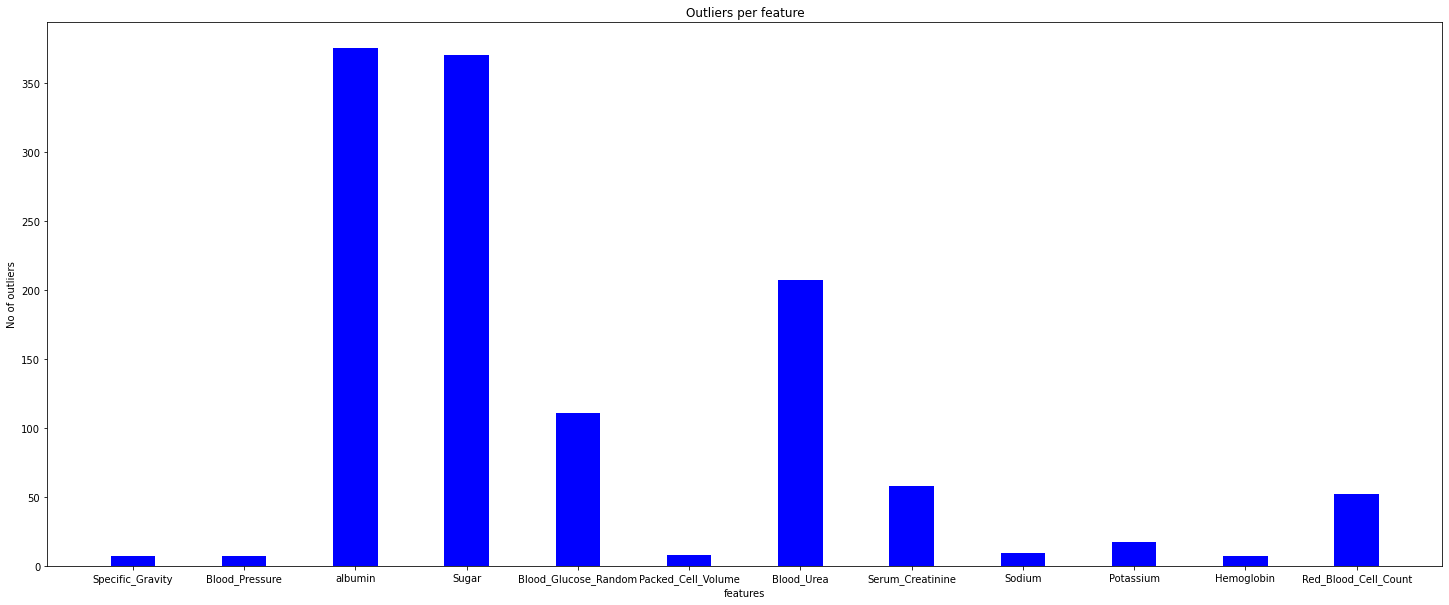

In [61]:
fig = plt.figure(figsize = (25, 10))
plt.bar(outlier_list, outlier_val, color ='blue',
        width = 0.4)
 
plt.xlabel("features")
plt.ylabel("No of outliers")
plt.title("Outliers per feature")
plt.show()

In [62]:
len(index_list)

52

Text(0.5, 1.0, 'Outliers Presence')

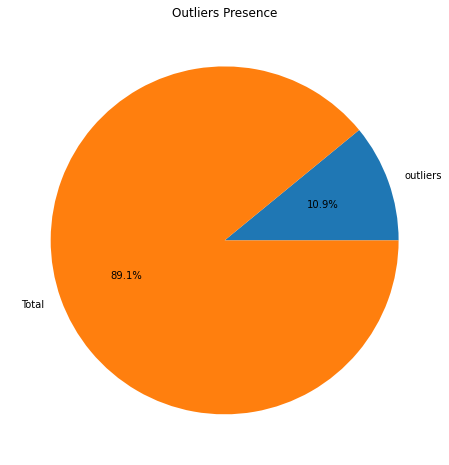

In [63]:
#Making a pie chart
total=[1228,10000]
labs=['outliers','Total']
plt.figure(figsize=(8,8))

plt.pie(total,labels=labs,autopct='%0.1f%%')
plt.title('Outliers Presence')

## Traitement des outliers avec KNN et MICE

### KNN

In [64]:
pip install impyute

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [66]:
from fancyimpute import KNN

In [67]:
df_KNN=df1.copy()

In [68]:
imputer = KNN()

In [69]:
df_KNN.isna().sum()

Age                          0
Blood_Pressure               7
Specific_Gravity             7
albumin                    375
Sugar                      370
Red_Blood_Cells              0
Cell_Pussy                   0
Puss_Cell_Clumps             0
Bacteria                     0
Blood_Glucose_Random       111
Blood_Urea                 207
Serum_Creatinine            58
Sodium                       9
Potassium                   17
Hemoglobin                   7
Packed_Cell_Volume           8
White_Blood_Cell_Count       0
Red_Blood_Cell_Count        52
Hypertension                 0
Diabetes_Mellitus            0
Coronary_Artery_Disease      0
Appetite                     0
Pedal_Edema                  0
Anemia                       0
ckd                          0
dtype: int64

In [70]:
X_train = df_KNN.loc[:400,]

In [71]:
df_KNN_imputed = pd.DataFrame(np.round(imputer.fit_transform(X_train)),columns = X_train.columns)

Imputing row 1/400 with 2 missing, elapsed time: 0.082
Imputing row 101/400 with 1 missing, elapsed time: 0.091
Imputing row 201/400 with 3 missing, elapsed time: 0.100
Imputing row 301/400 with 2 missing, elapsed time: 0.108


In [72]:
df_KNN_imputed.isna().sum()

Age                        0
Blood_Pressure             0
Specific_Gravity           0
albumin                    0
Sugar                      0
Red_Blood_Cells            0
Cell_Pussy                 0
Puss_Cell_Clumps           0
Bacteria                   0
Blood_Glucose_Random       0
Blood_Urea                 0
Serum_Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed_Cell_Volume         0
White_Blood_Cell_Count     0
Red_Blood_Cell_Count       0
Hypertension               0
Diabetes_Mellitus          0
Coronary_Artery_Disease    0
Appetite                   0
Pedal_Edema                0
Anemia                     0
ckd                        0
dtype: int64

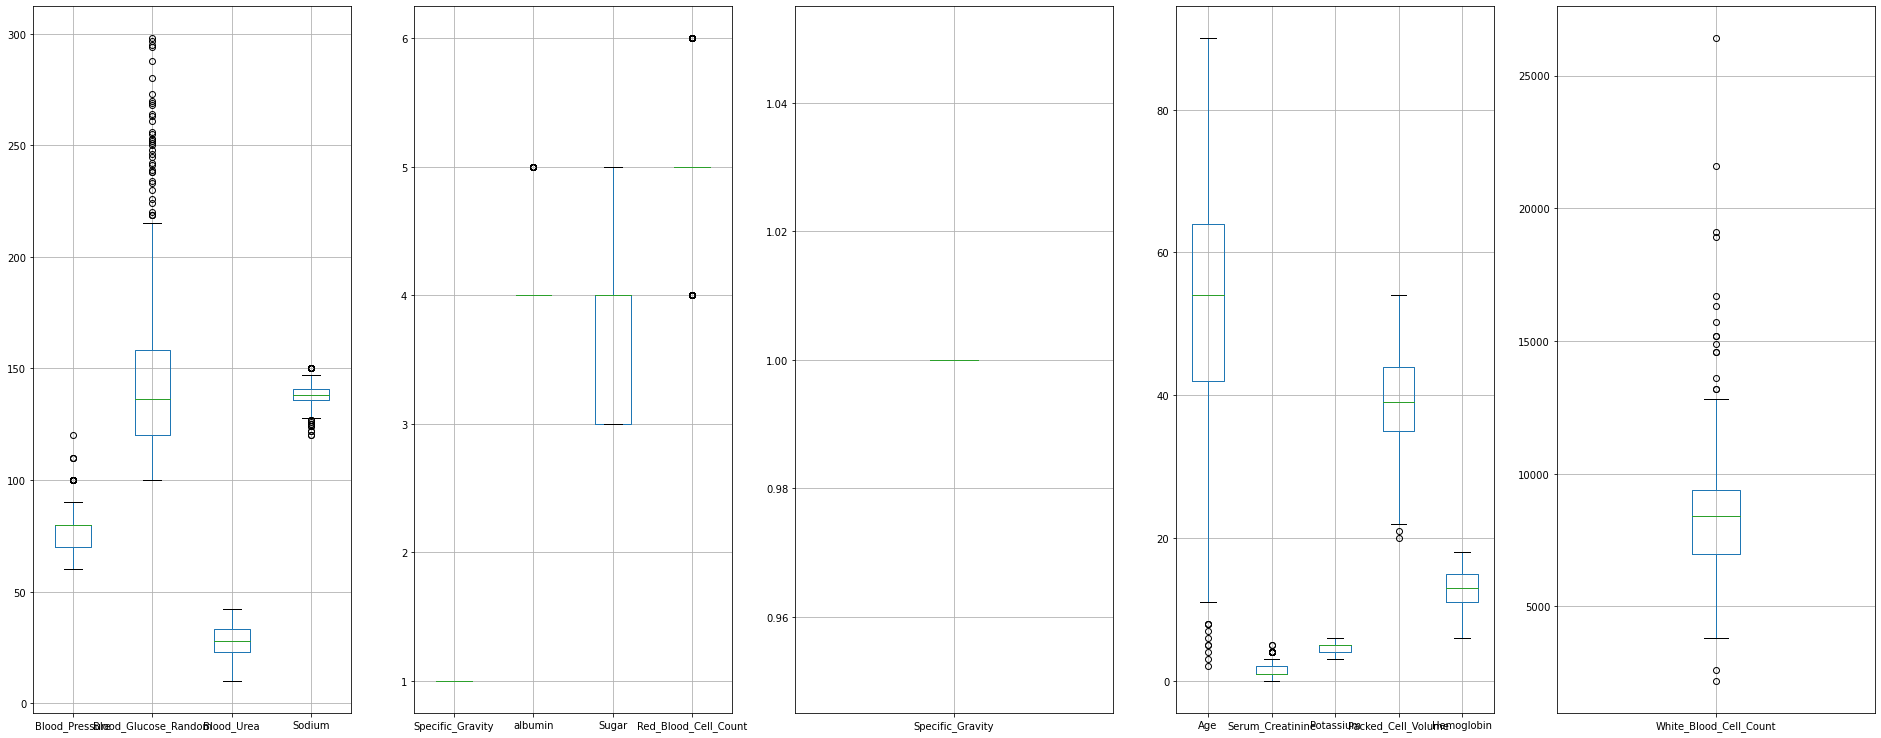

In [73]:
#after outliers imputation with KNN
plt.figure(figsize=(33,13))

plt.subplot(1, 5, 1)
df_KNN_imputed.boxplot(column = ['Blood_Pressure','Blood_Glucose_Random','Blood_Urea','Sodium'])
 
plt.subplot(1, 5, 2)
df_KNN_imputed.boxplot(column = ['Specific_Gravity', 'albumin','Sugar','Red_Blood_Cell_Count'])
plt.subplot(1, 5, 3)
df_KNN_imputed.boxplot(column = ['Specific_Gravity'])

plt.subplot(1, 5, 4)
df_KNN_imputed.boxplot(column = ['Age','Serum_Creatinine','Potassium','Packed_Cell_Volume','Hemoglobin' ])

plt.subplot(1, 5, 5)
df_KNN_imputed.boxplot(column = ['White_Blood_Cell_Count'])

plt.show()

## MICE

In [74]:
df_MICE=df1.copy()
df_MICE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood_Pressure           393 non-null    float64
 2   Specific_Gravity         393 non-null    float64
 3   albumin                  25 non-null     float64
 4   Sugar                    30 non-null     float64
 5   Red_Blood_Cells          400 non-null    int8   
 6   Cell_Pussy               400 non-null    int8   
 7   Puss_Cell_Clumps         400 non-null    int8   
 8   Bacteria                 400 non-null    int8   
 9   Blood_Glucose_Random     289 non-null    float64
 10  Blood_Urea               193 non-null    float64
 11  Serum_Creatinine         342 non-null    float64
 12  Sodium                   391 non-null    float64
 13  Potassium                383 non-null    float64
 14  Hemoglobin               3

In [75]:
X_MICE = df_MICE.loc[:400,]

In [76]:
X_MICE.isna().sum().sum()

1228

In [77]:
X_MICE_numerical = X_MICE.loc[:,outlier_list].astype('float64')

In [78]:
from impyute.imputation.cs import mice

In [79]:
df_MICE_imputed = mice(X_MICE_numerical.values)

In [80]:
X_MICE.loc[:,outlier_list] = df_MICE_imputed


In [81]:
X_MICE.isna().sum()

Age                        0
Blood_Pressure             0
Specific_Gravity           0
albumin                    0
Sugar                      0
Red_Blood_Cells            0
Cell_Pussy                 0
Puss_Cell_Clumps           0
Bacteria                   0
Blood_Glucose_Random       0
Blood_Urea                 0
Serum_Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed_Cell_Volume         0
White_Blood_Cell_Count     0
Red_Blood_Cell_Count       0
Hypertension               0
Diabetes_Mellitus          0
Coronary_Artery_Disease    0
Appetite                   0
Pedal_Edema                0
Anemia                     0
ckd                        0
dtype: int64

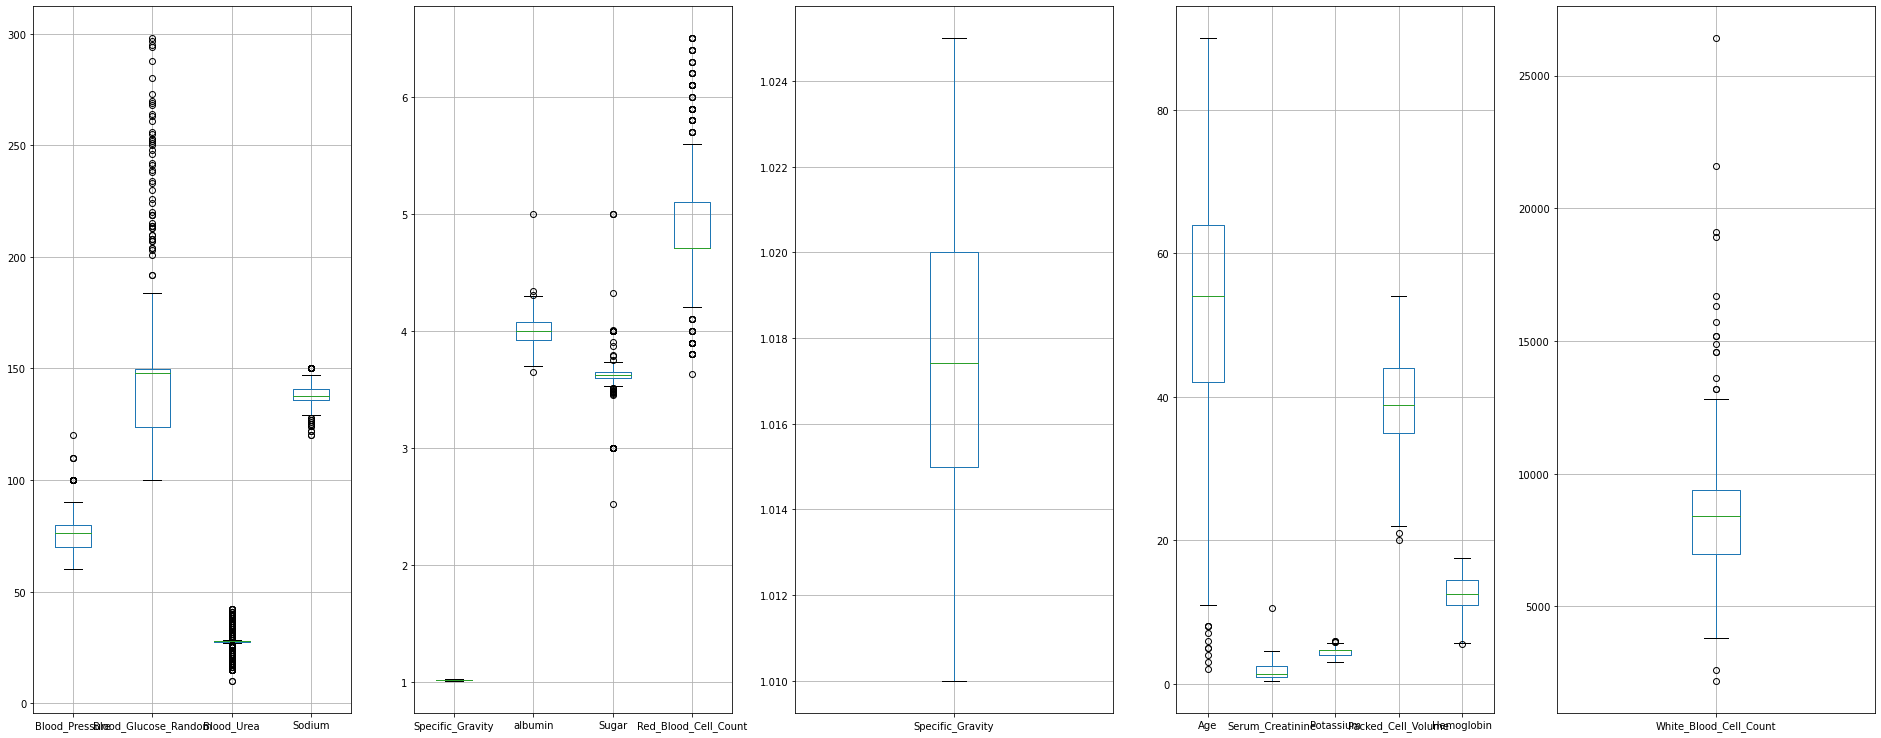

In [82]:
#after outliers imputation with MICE
plt.figure(figsize=(33,13))

plt.subplot(1, 5, 1)
X_MICE.boxplot(column = ['Blood_Pressure','Blood_Glucose_Random','Blood_Urea','Sodium'])
 
plt.subplot(1, 5, 2)
X_MICE.boxplot(column = ['Specific_Gravity', 'albumin','Sugar','Red_Blood_Cell_Count'])
plt.subplot(1, 5, 3)
X_MICE.boxplot(column = ['Specific_Gravity'])


plt.subplot(1, 5, 4)
X_MICE.boxplot(column = ['Age','Serum_Creatinine','Potassium','Packed_Cell_Volume','Hemoglobin' ])

plt.subplot(1, 5, 5)
X_MICE.boxplot(column = ['White_Blood_Cell_Count'])

plt.show()

## Output

=> According to articles and research we opted to use MICE methode in dealing with outliers because it is the most accurate methode of all the options as demonstrated in the graphe and article linked below
https://aip.scitation.org/doi/abs/10.1063/5.0053286?journalCode=apc
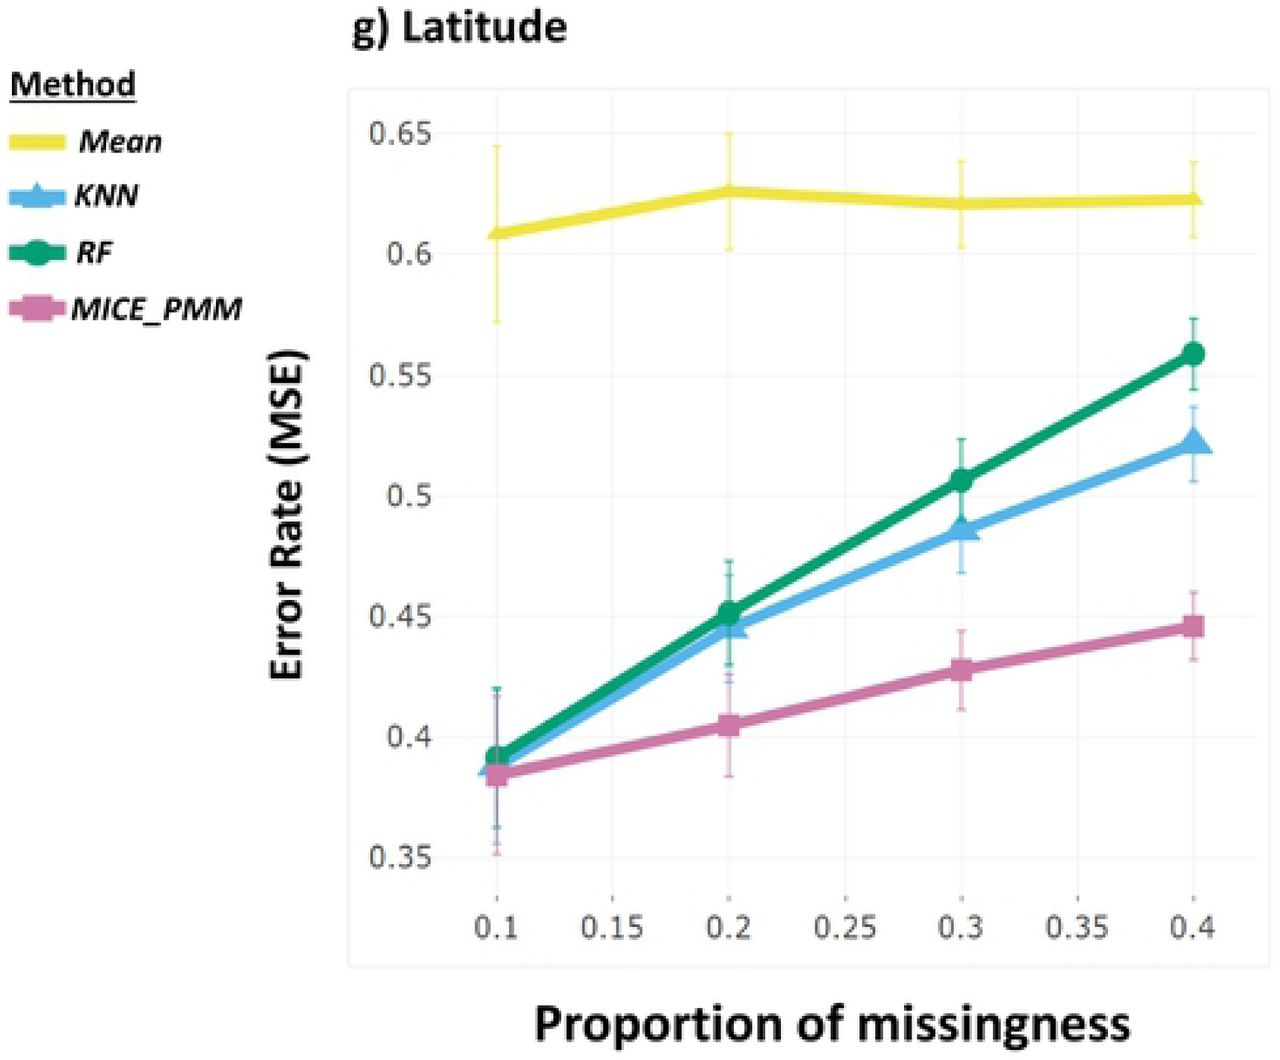

## Feature scaling

### min-max scaling: normalization

In [83]:
# # apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
#     # copy the dataframe
    df_norm = df.copy()
#     # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# # call the min_max_scaling function
df_normalized = min_max_scaling(X_MICE)

df_normalized

,Age,Blood_Pressure,Specific_Gravity,albumin,Sugar,Red_Blood_Cells,Cell_Pussy,Puss_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,ckd
0,0.522727,0.333333,0.666667,0.230905,0.463613,1.0,1.0,0.0,0.0,0.106061,...,0.705882,0.231405,0.546343,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.241760,0.666667,0.262292,0.511628,1.0,1.0,0.0,0.0,0.242609,...,0.529412,0.157025,0.375090,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.333333,0.000000,0.180547,0.194034,1.0,1.0,0.0,0.0,0.252129,...,0.323529,0.219008,0.375090,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.522727,0.166667,0.505130,0.262292,0.000000,1.0,0.0,1.0,0.0,0.085859,...,0.352941,0.185950,0.092685,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.556818,0.333333,0.000000,0.250274,0.440111,1.0,1.0,0.0,0.0,0.030303,...,0.441176,0.210744,0.336962,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.333333,0.666667,0.132514,0.462799,1.0,1.0,0.0,0.0,0.202020,...,0.794118,0.185950,0.441653,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,0.454545,0.166667,1.000000,0.294052,0.458954,1.0,1.0,0.0,0.0,0.251350,...,1.000000,0.231405,0.895310,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.113636,0.333333,0.666667,0.261174,0.448936,1.0,1.0,0.0,0.0,0.000000,...,0.852941,0.181818,0.616136,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.170455,0.000000,1.000000,0.272982,0.419651,1.0,1.0,0.0,0.0,0.070707,...,0.911765,0.206612,0.790620,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### standardization

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_MICE)
df_standardized = scaler.transform(X_MICE)
df_standardized.shape

(400, 25)

# Feature selection

In [85]:
from pandas.plotting import scatter_matrix 
# scatter_matrix(df,figsize=(25,15))

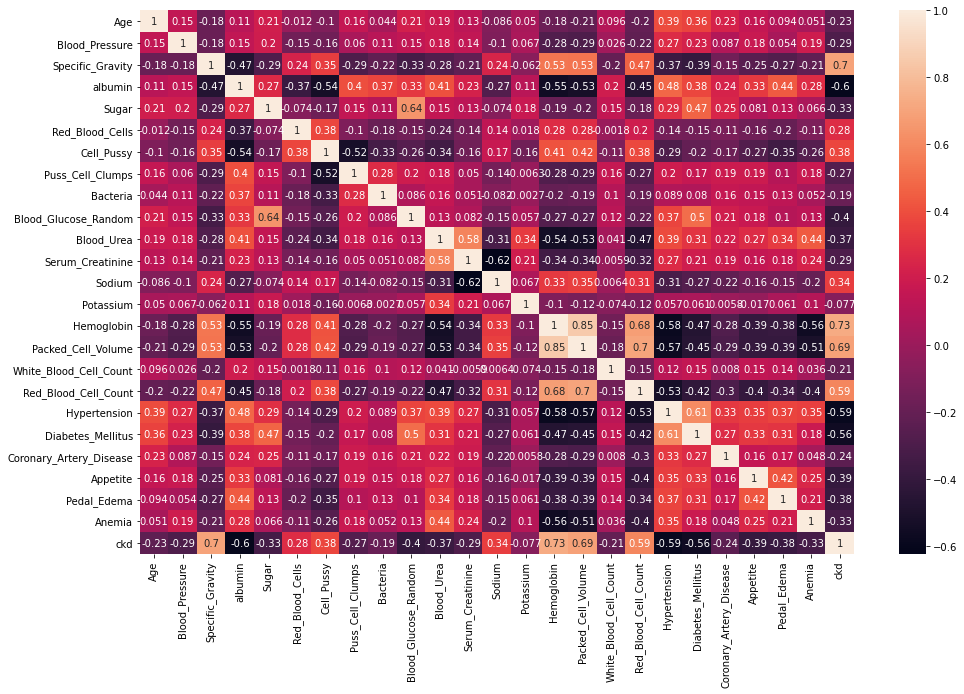

In [86]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(correlations, annot = True)
plt.show()

# RFE

In [87]:
df_ = df.copy().drop ('ckd',axis=1)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, 
           k_features=17, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(df_, df['ckd'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.4s finished

[2022-12-13 09:48:02] Features: 1/17 -- score: 0.8975[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2022-12-13 09:48:02] Features: 2/17 -- score: 0.9525[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2022-12-13 09:48:03] Features: 3/17 -- score: 0.9725[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rem

In [89]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

C:\Users\khalil\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\khalil\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)",[0.8975],0.8975,"(Hemoglobin,)",NaN,0.0,NaN
2,"(3, 14)",[0.9525],0.9525,"(albumin, Hemoglobin)",NaN,0.0,NaN
3,"(3, 14, 19)",[0.9725],0.9725,"(albumin, Hemoglobin, Diabetes_Mellitus)",NaN,0.0,NaN
4,"(3, 14, 17, 19)",[0.9775],0.9775,"(albumin, Hemoglobin, Red_Blood_Cell_Count, Di...",NaN,0.0,NaN
5,"(1, 3, 14, 17, 19)",[0.98],0.98,"(Blood_Pressure, albumin, Hemoglobin, Red_Bloo...",NaN,0.0,NaN
6,"(1, 3, 6, 14, 17, 19)",[0.985],0.985,"(Blood_Pressure, albumin, Cell_Pussy, Hemoglob...",NaN,0.0,NaN
7,"(1, 3, 6, 14, 17, 19, 22)",[0.9875],0.9875,"(Blood_Pressure, albumin, Cell_Pussy, Hemoglob...",NaN,0.0,NaN
8,"(1, 2, 3, 6, 14, 17, 19, 22)",[0.9875],0.9875,"(Blood_Pressure, Specific_Gravity, albumin, Ce...",NaN,0.0,NaN
9,"(1, 2, 3, 6, 7, 14, 17, 19, 22)",[0.9875],0.9875,"(Blood_Pressure, Specific_Gravity, albumin, Ce...",NaN,0.0,NaN
10,"(1, 2, 3, 6, 7, 8, 14, 17, 19, 22)",[0.9875],0.9875,"(Blood_Pressure, Specific_Gravity, albumin, Ce...",NaN,0.0,NaN


In [90]:
sfs1.k_feature_names_

('Blood_Pressure',
 'Specific_Gravity',
 'albumin',
 'Sugar',
 'Red_Blood_Cells',
 'Cell_Pussy',
 'Puss_Cell_Clumps',
 'Bacteria',
 'Serum_Creatinine',
 'Potassium',
 'Hemoglobin',
 'Red_Blood_Cell_Count',
 'Hypertension',
 'Diabetes_Mellitus',
 'Coronary_Artery_Disease',
 'Pedal_Edema',
 'Anemia')

In [91]:
df_fs = df.copy()
for ft in df.columns:
    if ft not in sfs1.k_feature_names_ :
        df_fs=df_fs.drop([ft], axis=1)
    
df_fs.shape

(400, 17)

In [92]:
df_fs_optimal = df.copy()
for ft in df.columns:
    if ft not in ['Blood_Pressure','albumin','Cell_Pussy','Hemoglobin','Red_Blood_Cell_Count','Diabetes_Mellitus','Pedal_Edema']:
        df_fs_optimal=df_fs_optimal.drop([ft], axis=1)
    
df_fs_optimal.shape

(400, 7)

## Dimensionality reduction

Text(0, 0.5, 'Second Principal Component')

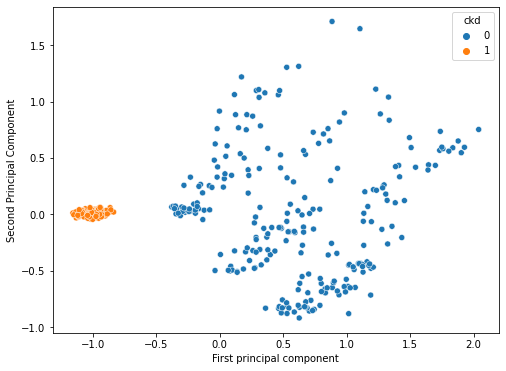

In [93]:
# create the PCA instance
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# fit on data: Apply PCA on data
principal_components = pca.fit_transform(df_normalized)

plt.figure(figsize=(8,6))
# plt.scatter(principal_components[:,0],principal_components[:,1])
sns.scatterplot(data=df,x=principal_components[:,0], y=principal_components[:,1],hue='ckd')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

C:\Users\khalil\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.149s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.427833
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.900639
[t-SNE] KL divergence after 1000 iterations: 0.631001


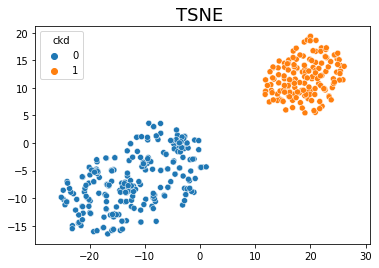

In [94]:
#We can clearly notice the clusters with tnse methode 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(df_normalized)
#plt.scatter(z_tsne[:,0],z_tsne[:,1])
sns.scatterplot(data=df,x=z_tsne[:,0], y=z_tsne[:,1],hue='ckd')
plt.title("TSNE ",size=18)
plt.axis("equal")
plt.show()

## KNN (gridsearch) without feature selection 


In [95]:
df_nor = min_max_scaling(df)

In [96]:
# #Séparer les variables explicatives X/Classe y
X =  df_nor.drop(['ckd'], axis=1)
y = df_nor['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_score 
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Erreur')

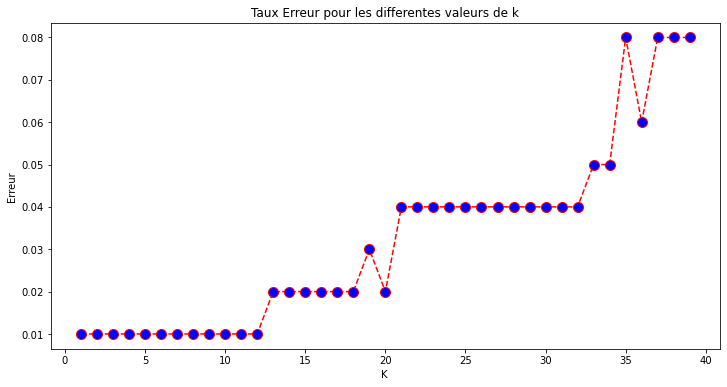

In [98]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# # Calculer l'erreur pour k entre 1 et 40 
# #Pour chaque itération, l'err²eur moyenne pour les valeurs prédites 
# #de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# # Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
     knn = KNeighborsClassifier(i,metric='manhattan')
     knn_model = knn.fit(X_train, y_train)
     pred_i = knn_model.predict(X_test)
     error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [99]:
from sklearn.model_selection import GridSearchCV


n_neighbors = list(range(1,100))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
# #Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
# #Create new KNN object
knn_2 = KNeighborsClassifier()
# #Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

# #cv: number of folds of the cross validation

# #Fit the model
best_model = clf.fit(X_train, y_train)
# #Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 1


In [100]:
# # Afficher les paramètres qui donnent les meilleurs performances
best_parameters = clf.best_params_
print(best_parameters)

{'n_neighbors': 1, 'p': 1}


In [101]:
# #Taux de bonne classification
best_result = clf.best_score_
print(best_result)

0.9866666666666667


In [102]:
knn = KNeighborsClassifier(4,p=1)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))
model_results_KNNw = pd.DataFrame([['KNN GridSearch CV ', accuracy_score(y_test,y_pred_knn),precision_score(y_test, y_pred_knn),recall_score(y_test, y_pred_knn),f1_score(y_test,y_pred_knn)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_KNNw

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN GridSearch CV,0.99,0.974359,1.0,0.987013


Test Data Accuracy: 0.9900


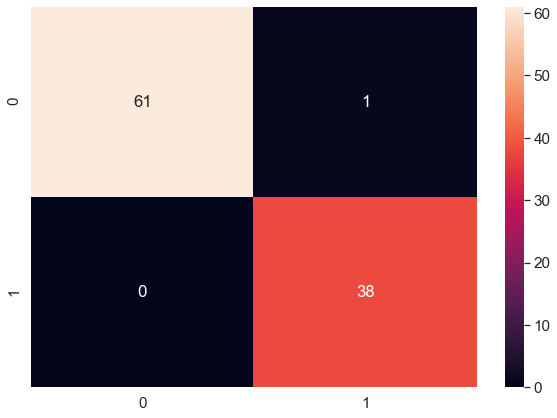

In [104]:
cm = confusion_matrix(y_test,y_pred_knn) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test,y_pred_knn))

In [105]:
# define the tree depths to evaluate
values = [i for i in range(1, 18)]
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

>1, train: 1.000, test: 0.990
>2, train: 1.000, test: 0.990
>3, train: 0.987, test: 0.990
>4, train: 0.987, test: 0.990
>5, train: 0.983, test: 0.990
>6, train: 0.983, test: 0.990
>7, train: 0.973, test: 0.990
>8, train: 0.980, test: 0.990
>9, train: 0.970, test: 0.990
>10, train: 0.970, test: 0.990
>11, train: 0.970, test: 0.990
>12, train: 0.973, test: 0.990
>13, train: 0.967, test: 0.980
>14, train: 0.967, test: 0.980
>15, train: 0.967, test: 0.980
>16, train: 0.967, test: 0.980
>17, train: 0.963, test: 0.980


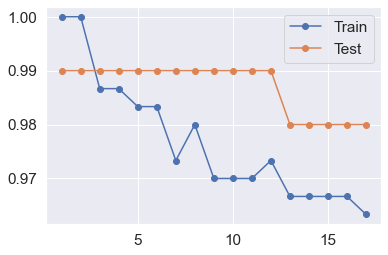

In [106]:
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(i,p=1)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Test Data Accuracy: 0.9900


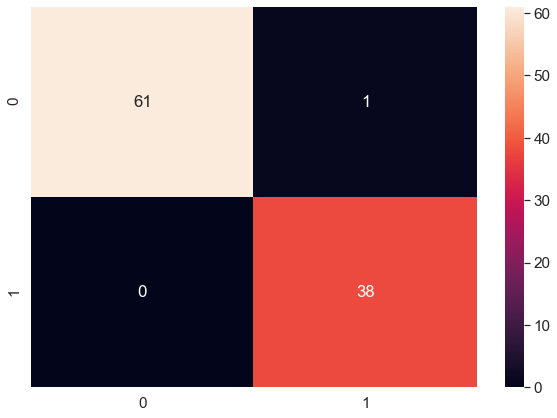

In [107]:
cm = confusion_matrix(y_test,y_pred_knn) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test,y_pred_knn))

In [108]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(knn_model, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.    0.975 1.    0.95  1.    0.95  1.    1.    0.975 0.975]
Average score: 0.98


### KNN (gridsearch) with RFE

In [109]:
df_norfs = min_max_scaling(df_fs)

In [110]:
# #Séparer les variables explicatives X/Classe y
X =  df_norfs
y = df_nor['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Text(0, 0.5, 'Erreur')

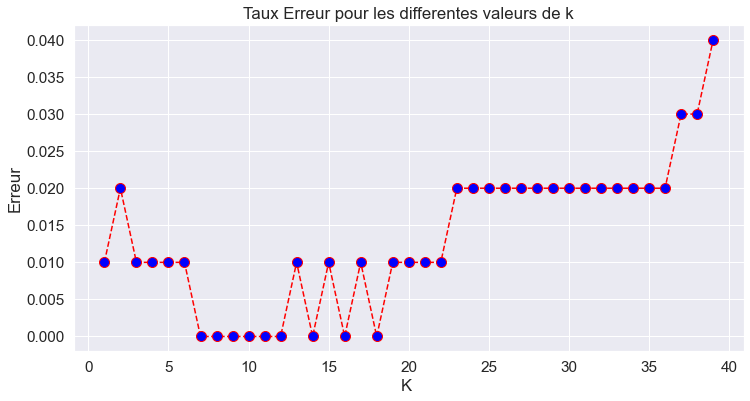

In [111]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# # Calculer l'erreur pour k entre 1 et 40 
# #Pour chaque itération, l'err²eur moyenne pour les valeurs prédites 
# #de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# # Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
     knn = KNeighborsClassifier(i,metric='manhattan')
     knn_model = knn.fit(X_train, y_train)
     pred_i = knn_model.predict(X_test)
     error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [112]:
from sklearn.model_selection import GridSearchCV


n_neighbors = list(range(1,100))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
# #Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
# #Create new KNN object
knn_2 = KNeighborsClassifier()
# #Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

# #cv: number of folds of the cross validation

# #Fit the model
best_model = clf.fit(X_train, y_train)
# #Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 1


In [113]:
# # Afficher les paramètres qui donnent les meilleurs performances
best_parameters = clf.best_params_
print(best_parameters)

{'n_neighbors': 1, 'p': 2}


In [114]:
# #Taux de bonne classification
best_result = clf.best_score_
print(best_result)

0.9966666666666667


In [115]:
knn = KNeighborsClassifier(6,p=2)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))
model_results_KNN = pd.DataFrame([['KNN GridSearch CV (RFE) ', accuracy_score(y_test,y_pred_knn),precision_score(y_test, y_pred_knn),recall_score(y_test, y_pred_knn),f1_score(y_test,y_pred_knn)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_KNN

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN GridSearch CV (RFE),0.99,1.0,0.973684,0.986667


In [117]:
# define the tree depths to evaluate
values = [i for i in range(1, 18)]
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

>1, train: 1.000, test: 0.990
>2, train: 1.000, test: 0.990
>3, train: 0.997, test: 0.990
>4, train: 1.000, test: 0.990
>5, train: 0.997, test: 0.990
>6, train: 0.990, test: 0.990
>7, train: 0.993, test: 1.000
>8, train: 0.993, test: 1.000
>9, train: 0.980, test: 1.000
>10, train: 0.983, test: 1.000
>11, train: 0.980, test: 1.000
>12, train: 0.980, test: 1.000
>13, train: 0.980, test: 1.000
>14, train: 0.980, test: 1.000
>15, train: 0.977, test: 1.000
>16, train: 0.977, test: 1.000
>17, train: 0.973, test: 1.000


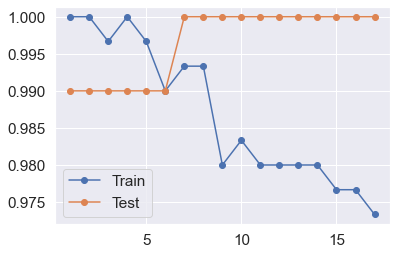

In [118]:
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(i,p=2)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [119]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(knn_model, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.    0.975 1.    0.925 0.975 0.975 0.95  1.    1.    1.   ]
Average score: 0.98


##  Decision Tree Classification (greadsearch) without features selection 

In [120]:
# #Séparer les variables explicatives X/Classe y
X =  df.drop(['ckd'], axis=1)
y = df['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier_DTR = DecisionTreeClassifier()
classifier_DTR.fit(X_train, y_train)
grid_param_DTR = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [ 2, 3, 5, 7],
    'min_samples_split' : [ 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtr = GridSearchCV(classifier_DTR, grid_param_DTR, cv = 10, n_jobs = -1, verbose = 1)
grid_search_dtr.fit(X_train, y_train)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits


C:\Users\khalil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [122]:
print(grid_search_dtr.best_params_)
print(grid_search_dtr.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}
0.9766666666666668


In [123]:
grid_DTR=DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=10,max_features='sqrt',min_samples_leaf=3,min_samples_split=3,splitter='best')


In [124]:
grid_DTR.fit(X_train, y_train)
pred_DTR=grid_DTR.predict(X_test)
print("Accuracy for  decision tree training  : ",accuracy_score(y_train,grid_DTR.predict(X_train)))
print("Accuracy for  decision tree  : ",accuracy_score(y_test,pred_DTR))

Accuracy for  decision tree training  :  0.9833333333333333
Accuracy for  decision tree  :  0.99


In [125]:
# define the tree depths to evaluate
values = [i for i in range(1, 11)]
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

>1, train: 0.853, test: 0.850
>2, train: 0.950, test: 0.950
>3, train: 0.983, test: 0.980
>4, train: 0.977, test: 0.960
>5, train: 0.987, test: 0.990
>6, train: 0.987, test: 0.990
>7, train: 0.987, test: 0.990
>8, train: 0.987, test: 0.990
>9, train: 0.987, test: 0.990
>10, train: 0.987, test: 0.990


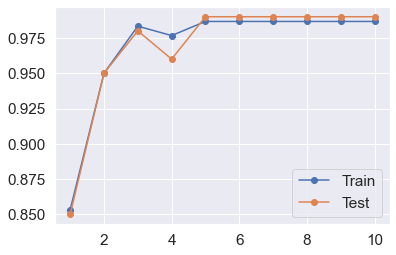

In [126]:
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 11)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=i,max_features='sqrt',min_samples_leaf=2,min_samples_split=5,splitter='best')

 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()
    

In [127]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(grid_DTR, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.925 0.975 1.    0.975 0.975 0.95  0.95  1.    1.    1.   ]
Average score: 0.97


In [128]:
model_results_DTRw = pd.DataFrame([['Decision Tree  GridSearch Cv  ', accuracy_score(y_test,pred_DTR),precision_score(y_test, pred_DTR),recall_score(y_test, pred_DTR),f1_score(y_test,pred_DTR)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_DTRw

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree GridSearch Cv,0.99,1.0,0.973684,0.986667


## Decision Tree  GridSearch Cv with feature selection

In [129]:
# #Séparer les variables explicatives X/Classe y
X =  df_fs
y = df['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier_DTR = DecisionTreeClassifier()
classifier_DTR.fit(X_train, y_train)
grid_param_DTR = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [ 2, 3, 5, 7],
    'min_samples_split' : [ 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtr = GridSearchCV(classifier_DTR, grid_param_DTR, cv = 10, n_jobs = -1, verbose = 1)
grid_search_dtr.fit(X_train, y_train)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits


C:\Users\khalil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [131]:
print(grid_search_dtr.best_params_)
print(grid_search_dtr.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
0.9766666666666668


In [132]:
grid_DTR=DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=3,splitter='best')


In [133]:
grid_DTR.fit(X_train, y_train)
pred_DTR=grid_DTR.predict(X_test)
print("Accuracy for  decision tree  : ",accuracy_score(y_test,pred_DTR))

Accuracy for  decision tree  :  0.96


C:\Users\khalil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [134]:
# define the tree depths to evaluate
values = [i for i in range(1, 11)]
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

>1, train: 0.853, test: 0.850
>2, train: 0.917, test: 0.890
>3, train: 0.927, test: 0.920
>4, train: 0.973, test: 0.960
>5, train: 0.980, test: 0.950
>6, train: 0.983, test: 0.950
>7, train: 0.980, test: 0.940
>8, train: 0.983, test: 0.950
>9, train: 0.987, test: 0.940
>10, train: 0.987, test: 0.940


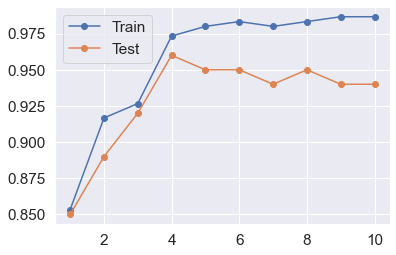

In [135]:
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 11)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=i,max_features='log2',min_samples_leaf=2,min_samples_split=3,splitter='best')

 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [136]:
model_results_DTR = pd.DataFrame([['Decision Tree  GridSearch Cv (RFE) ', accuracy_score(y_test,pred_DTR),precision_score(y_test, pred_DTR),recall_score(y_test, pred_DTR),f1_score(y_test,pred_DTR)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_DTR

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree GridSearch Cv (RFE),0.96,0.972222,0.921053,0.945946


Test Data Accuracy: 0.9600


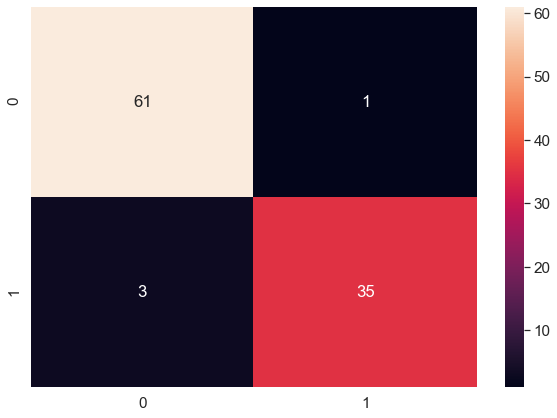

In [137]:
cm = confusion_matrix(y_test, pred_DTR) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test,pred_DTR))

In [138]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(grid_DTR, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.975 0.975 1.    0.975 0.925 0.925 0.95  0.975 1.    0.95 ]
Average score: 0.96


C:\Users\khalil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\U

## visualisation DTC

In [139]:
#pip install graphviz

In [140]:
#pip install pydotplus

In [141]:
feature_cols=X.columns.tolist()
feature_cols

['Blood_Pressure',
 'Specific_Gravity',
 'albumin',
 'Sugar',
 'Red_Blood_Cells',
 'Cell_Pussy',
 'Puss_Cell_Clumps',
 'Bacteria',
 'Serum_Creatinine',
 'Potassium',
 'Hemoglobin',
 'Red_Blood_Cell_Count',
 'Hypertension',
 'Diabetes_Mellitus',
 'Coronary_Artery_Disease',
 'Pedal_Edema',
 'Anemia']

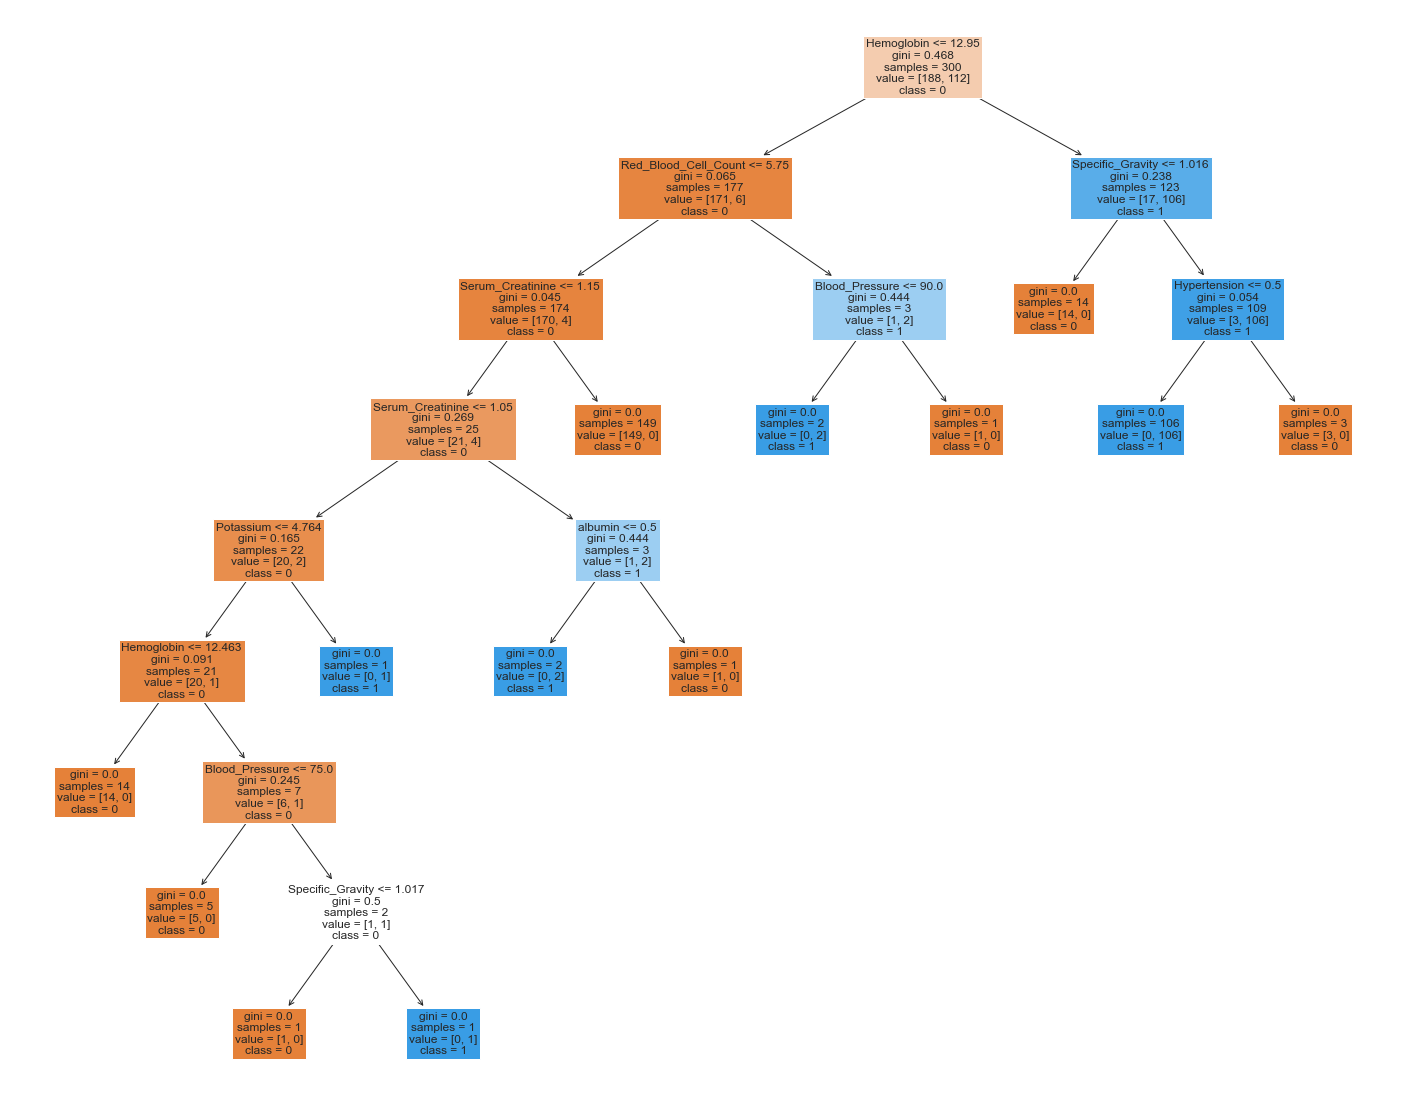

In [142]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(classifier_DTR,
                  feature_names = feature_cols,
                  class_names=['0','1'],
                  filled=True)

## Random Forest Classification (gridsearch) without feature selection 

In [143]:
# #Séparer les variables explicatives X/Classe y
X =  df.drop(['ckd'], axis=1)
y = df['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [144]:
from sklearn.ensemble import RandomForestClassifier
classifier_RDF = RandomForestClassifier()
classifier_RDF.fit(X_train, y_train)

RandomForestClassifier()

In [145]:
grid_param_RDF = {
   'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search_rdf = GridSearchCV(classifier_RDF, grid_param_RDF, cv = 10, n_jobs = -1, verbose = 1)
grid_search_rdf.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


C:\Users\khalil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [146]:
print(grid_search_rdf.best_params_)
print(grid_search_rdf.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.99


In [147]:
grid_RDF=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=5, criterion='gini')

In [148]:
grid_RDF.fit(X_train, y_train)
pred_RDF=grid_RDF.predict(X_test)
model_results_RDFw = pd.DataFrame([['Random Forest  GridSearch CV ', accuracy_score(y_test,pred_RDF),precision_score(y_test, pred_RDF),recall_score(y_test, pred_RDF),f1_score(y_test,pred_RDF)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_RDFw

C:\Users\khalil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest GridSearch CV,1.0,1.0,1.0,1.0


In [149]:
print("Accuracy for  RFC training  : ",accuracy_score(y_train,grid_RDF.predict(X_train)))
print("Accuracy for  RFC test  : ",accuracy_score(y_test,pred_RDF))

Accuracy for  RFC training  :  1.0
Accuracy for  RFC test  :  1.0


In [150]:
# define the max depths to evaluate
values = [i for i in range(1, 7)]
values

[1, 2, 3, 4, 5, 6]

>1, train: 0.973, test: 0.980
>2, train: 0.987, test: 0.990
>3, train: 0.990, test: 0.990
>4, train: 0.993, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000


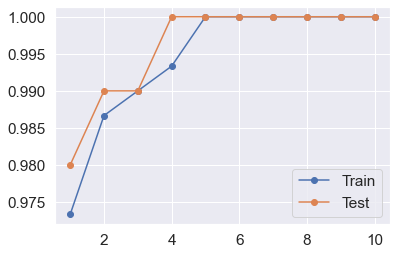

In [151]:
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 11)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators= 200, max_depth=i, criterion='gini')
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Test Data Accuracy: 1.0000


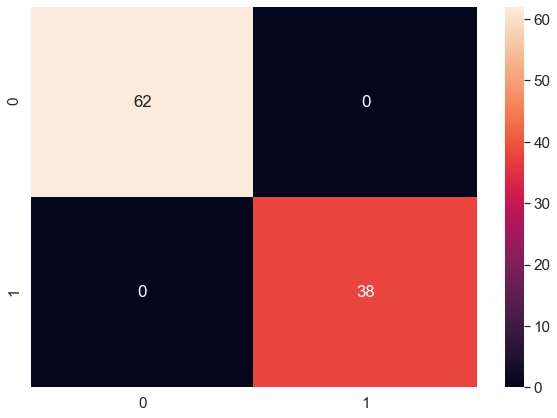

In [152]:
CMRF=confusion_matrix(y_test, pred_RDF)
df_cm = pd.DataFrame(CMRF, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, pred_RDF)) 

In [153]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(grid_RDF, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

C:\Users\khalil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Scores for each fold are: [0.975 1.    1.    1.    1.    0.975 0.975 1.    1.    1.   ]
Average score: 0.99


### Random Forest Classification (gridsearch) RFE

In [154]:
# #Séparer les variables explicatives X/Classe y
X =  df_fs
y = df['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [155]:
from sklearn.ensemble import RandomForestClassifier
classifier_RDF = RandomForestClassifier()
classifier_RDF.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
grid_param_RDF = {
   'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search_rdf = GridSearchCV(classifier_RDF, grid_param_RDF, cv = 10, n_jobs = -1, verbose = 1)
grid_search_rdf.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


C:\Users\khalil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [157]:
print(grid_search_rdf.best_params_)
print(grid_search_rdf.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.99


In [158]:
grid_RDF=RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators= 200, max_depth=5, criterion='gini')

In [159]:
# define the max depths to evaluate
values = [i for i in range(1, 7)]
values

[1, 2, 3, 4, 5, 6]

>1, train: 0.967, test: 0.990
>2, train: 0.987, test: 0.990
>3, train: 0.987, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000


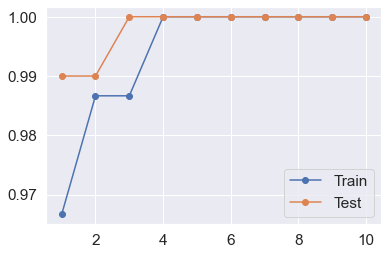

In [160]:
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 11)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators= 200, max_depth=i, criterion='gini')
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [161]:
grid_RDF.fit(X_train, y_train)
pred_RDF=grid_RDF.predict(X_test)
model_results_RDF = pd.DataFrame([['Random Forest  GridSearch CV (RFE) ', accuracy_score(y_test,pred_RDF),precision_score(y_test, pred_RDF),recall_score(y_test, pred_RDF),f1_score(y_test,pred_RDF)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_RDF

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest GridSearch CV (RFE),1.0,1.0,1.0,1.0


In [162]:
print("Accuracy for  RFC training  : ",accuracy_score(y_train,grid_RDF.predict(X_train)))
print("Accuracy for  RFC test  : ",accuracy_score(y_test,pred_RDF))

Accuracy for  RFC training  :  1.0
Accuracy for  RFC test  :  1.0


Test Data Accuracy: 1.0000


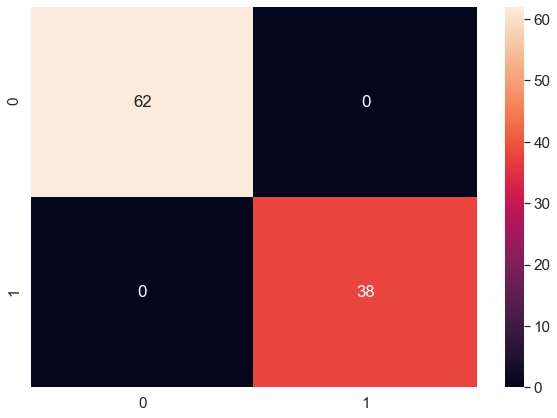

In [163]:
CMRF=confusion_matrix(y_test, pred_RDF)
df_cm = pd.DataFrame(CMRF, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, pred_RDF)) 

In [164]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(grid_RDF, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.    1.    1.    1.    1.    0.975 0.95  1.    1.    1.   ]
Average score: 0.99


## Support Vector Machines SVM without feature selection 

In [165]:
# #Séparer les variables explicatives X/Classe y
X =  df_nor.drop(['ckd'], axis=1)
y = df_nor['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [166]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [167]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, cv=10, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [168]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [169]:
model = SVC(C=100, gamma=1,kernel='rbf')
model.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [170]:
grid_predictions = model.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions))
model_results_SVMw = pd.DataFrame([['SVM GridSearch CV', accuracy_score(y_test,grid_predictions),precision_score(y_test, grid_predictions),recall_score(y_test, grid_predictions),f1_score(y_test,grid_predictions)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_SVMw

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



,Model,Accuracy,Precision,Recall,F1 Score
0,SVM GridSearch CV,1.0,1.0,1.0,1.0


Test Data Accuracy: 1.0000


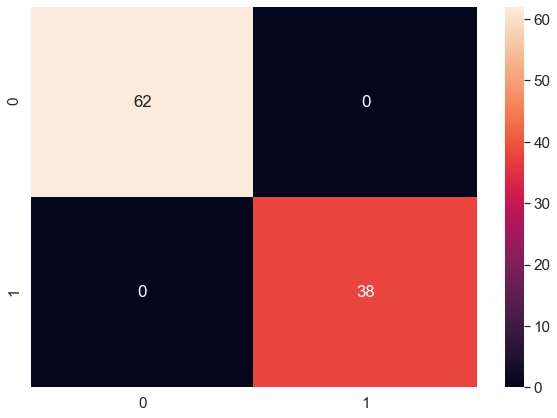

In [171]:
CMRF=confusion_matrix(y_test, grid_predictions)
df_cm = pd.DataFrame(CMRF, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, grid_predictions)) 

In [172]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(model, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.    0.975 1.    1.    1.    1.    1.    1.    1.    0.975]
Average score: 0.99


### Support Vector Machines SVM with RFE

In [173]:
# #Séparer les variables explicatives X/Classe y
X =  df_norfs
y = df_nor['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [174]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [175]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, cv=10, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [176]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [177]:
model = SVC(C=10, gamma=1,kernel='rbf')
model.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [178]:
grid_predictions = model.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions))
model_results_SVM = pd.DataFrame([['SVM GridSearch CV (RFE)', accuracy_score(y_test,grid_predictions),precision_score(y_test, grid_predictions),recall_score(y_test, grid_predictions),f1_score(y_test,grid_predictions)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_SVM

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        62
         1.0       1.00      0.97      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



,Model,Accuracy,Precision,Recall,F1 Score
0,SVM GridSearch CV (RFE),0.99,1.0,0.973684,0.986667


In [179]:
print("Accuracy for  decision tree training  : ",accuracy_score(y_train,model.predict(X_train)))
print("Accuracy for  decision tree  : ",accuracy_score(y_test,grid_predictions))

Accuracy for  decision tree training  :  0.99
Accuracy for  decision tree  :  0.99


Test Data Accuracy: 0.9900


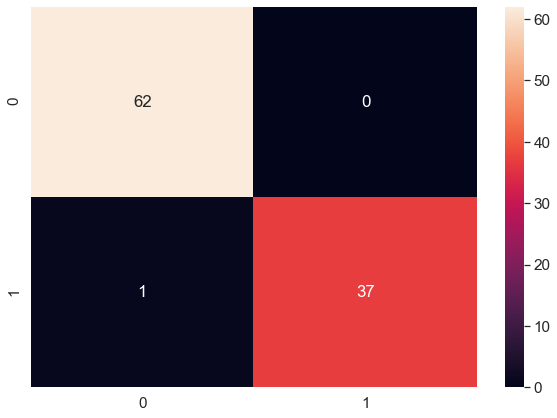

In [180]:
CMRF=confusion_matrix(y_test, grid_predictions)
df_cm = pd.DataFrame(CMRF, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, grid_predictions)) 

In [181]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(model, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.    1.    1.    0.95  1.    0.975 1.    0.975 1.    0.975]
Average score: 0.99


## R Logistique without feature selection 

In [182]:
# #Séparer les variables explicatives X/Classe y
X =  df_nor.drop(['ckd'], axis=1)
y = df_nor['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [183]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)



C:\Users\khalil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [184]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9933333333333334


In [185]:
logreg2=LogisticRegression(C=100.0,penalty="l2")
logreg2.fit(X_train,y_train)
RL_grid_predictions = logreg2.predict(X_test)
model_results_RLw = pd.DataFrame([['RL GridSearch CV', accuracy_score(y_test,RL_grid_predictions),precision_score(y_test, RL_grid_predictions),recall_score(y_test, RL_grid_predictions),f1_score(y_test,RL_grid_predictions)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_RLw


,Model,Accuracy,Precision,Recall,F1 Score
0,RL GridSearch CV,1.0,1.0,1.0,1.0


In [186]:
print("Accuracy for  RL training  : ",accuracy_score(y_train,logreg2.predict(X_train)))
print("Accuracy for   RL test  : ",accuracy_score(y_test,RL_grid_predictions))

Accuracy for  RL training  :  1.0
Accuracy for   RL test  :  1.0


In [187]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(logreg2, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.    0.975 1.    1.    1.    1.    1.    1.    1.    0.975]
Average score: 0.99


Test Data Accuracy: 1.0000


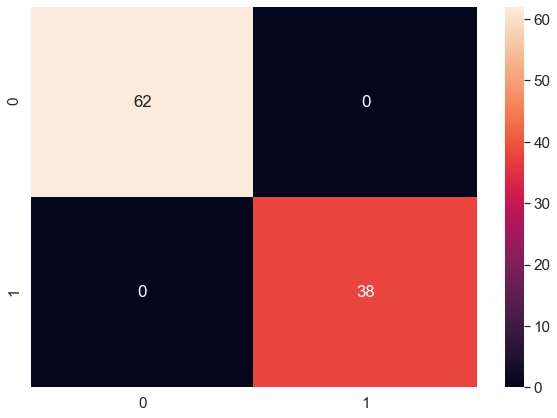

In [188]:
CMRF=confusion_matrix(y_test, RL_grid_predictions)
df_cm = pd.DataFrame(CMRF, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, RL_grid_predictions)) 

### R Logistique with RFE

In [189]:
# #Séparer les variables explicatives X/Classe y
X =  df_norfs
y = df_nor['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [190]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

C:\Users\khalil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [191]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9866666666666667


In [192]:
logreg2=LogisticRegression(C=100.0,penalty="l2")
logreg2.fit(X_train,y_train)
RL_grid_predictions = logreg2.predict(X_test)
model_results_RL = pd.DataFrame([['RL GridSearch CV (RFE)', accuracy_score(y_test,RL_grid_predictions),precision_score(y_test, RL_grid_predictions),recall_score(y_test, RL_grid_predictions),f1_score(y_test,RL_grid_predictions)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_RL

,Model,Accuracy,Precision,Recall,F1 Score
0,RL GridSearch CV (RFE),0.99,1.0,0.973684,0.986667


In [193]:
print("Accuracy for  decision tree training  : ",accuracy_score(y_train,logreg2.predict(X_train)))
print("Accuracy for  decision tree  : ",accuracy_score(y_test,RL_grid_predictions))

Accuracy for  decision tree training  :  0.9933333333333333
Accuracy for  decision tree  :  0.99


Test Data Accuracy: 0.9900


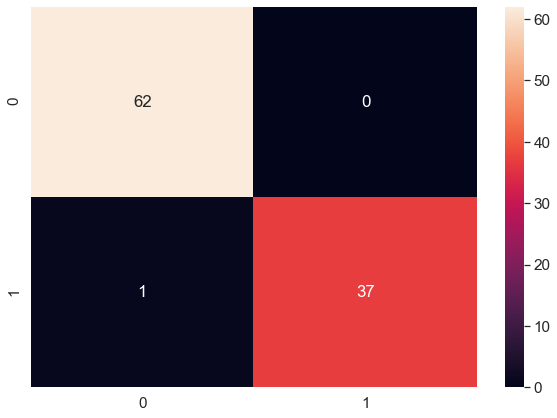

In [194]:
CMRF=confusion_matrix(y_test, RL_grid_predictions)
df_cm = pd.DataFrame(CMRF, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, RL_grid_predictions)) 

## naive bayes (Greadsearch cv) without feature selection 

In [195]:
X =  df.drop(['ckd'], axis=1)
y = df['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [196]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

#Fitting 10 folds for each of 100 candidates, totalling 1000 fits
#GaussianNB(priors=None, var_smoothing=1.0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=2.848035868435805e-09)


In [197]:
n_bayes=GaussianNB(var_smoothing=2.848035868435805e-09)
n_bayes.fit(X_train,y_train)
NB_grid_predictions = n_bayes.predict(X_test)
model_results_NBw = pd.DataFrame([['Naive bayes GridSearch CV', accuracy_score(y_test,NB_grid_predictions),precision_score(y_test, NB_grid_predictions),recall_score(y_test, NB_grid_predictions),f1_score(y_test,NB_grid_predictions)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_NBw

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive bayes GridSearch CV,0.97,0.926829,1.0,0.962025


In [198]:
print("Accuracy for  Naive bayes train   : ",accuracy_score(y_train,n_bayes.predict(X_train)))
print("Accuracy for  Naive bayes   : ",accuracy_score(y_test,NB_grid_predictions))

Accuracy for  Naive bayes train   :  0.9566666666666667
Accuracy for  Naive bayes   :  0.97


In [199]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(n_bayes, X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.975 0.975 1.    0.925 0.95  0.925 0.95  1.    0.925 0.95 ]
Average score: 0.96


Test Data Accuracy: 0.9700


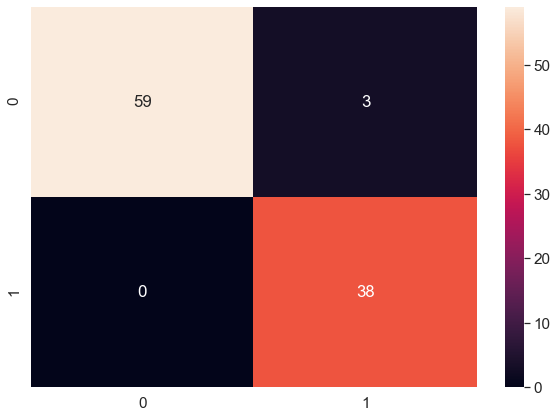

In [200]:
CMRF=confusion_matrix(y_test, NB_grid_predictions)
df_cm = pd.DataFrame(CMRF, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, NB_grid_predictions)) 

## naive bayes (Greadsearch cv) with RFE

In [201]:
# #Séparer les variables explicatives X/Classe y
X =  df_fs
y = df['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [202]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

#Fitting 10 folds for each of 100 candidates, totalling 1000 fits
#GaussianNB(priors=None, var_smoothing=1.0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0001)


In [203]:
n_bayes=GaussianNB(var_smoothing=0.0001)
n_bayes.fit(X_train,y_train)
NB_grid_predictions = n_bayes.predict(X_test)
model_results_NB = pd.DataFrame([['Naive bayes GridSearch CV (RFE)', accuracy_score(y_test,NB_grid_predictions),precision_score(y_test, NB_grid_predictions),recall_score(y_test, NB_grid_predictions),f1_score(y_test,NB_grid_predictions)]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
model_results_NB

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive bayes GridSearch CV (RFE),0.97,0.926829,1.0,0.962025


In [204]:
print("Accuracy for  Naive bayes train   : ",accuracy_score(y_train,n_bayes.predict(X_train)))
print("Accuracy for  Naive bayes   : ",accuracy_score(y_test,NB_grid_predictions))

Accuracy for  Naive bayes train   :  0.9533333333333334
Accuracy for  Naive bayes   :  0.97


Test Data Accuracy: 0.9700


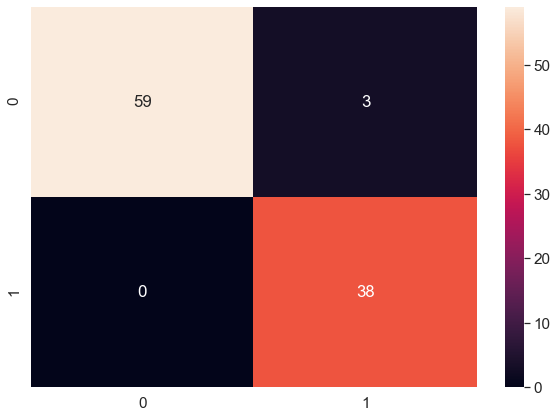

In [205]:
CMRF=confusion_matrix(y_test, NB_grid_predictions)
df_cm = pd.DataFrame(CMRF, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, NB_grid_predictions)) 

# Models

In [206]:
results = pd.concat([model_results_RLw,model_results_RL], ignore_index=True)
results = pd.concat([results,model_results_SVMw], ignore_index=True)
results = pd.concat([results,model_results_SVM], ignore_index=True)
results = pd.concat([results,model_results_DTRw], ignore_index=True)
results = pd.concat([results,model_results_DTR], ignore_index=True)
results = pd.concat([results,model_results_RDFw], ignore_index=True)
results = pd.concat([results,model_results_RDF], ignore_index=True)
results = pd.concat([results,model_results_KNNw], ignore_index=True)
results = pd.concat([results,model_results_KNN], ignore_index=True)
results = pd.concat([results,model_results_NBw], ignore_index=True)
results = pd.concat([results,model_results_NB], ignore_index=True)

results.T

,0,1,2,3,4,5,6,7,8,9,10,11
Model,RL GridSearch CV,RL GridSearch CV (RFE),SVM GridSearch CV,SVM GridSearch CV (RFE),Decision Tree GridSearch Cv,Decision Tree GridSearch Cv (RFE),Random Forest GridSearch CV,Random Forest GridSearch CV (RFE),KNN GridSearch CV,KNN GridSearch CV (RFE),Naive bayes GridSearch CV,Naive bayes GridSearch CV (RFE)
Accuracy,1.0,0.99,1.0,0.99,0.99,0.96,1.0,1.0,0.99,0.99,0.97,0.97
Precision,1.0,1.0,1.0,1.0,1.0,0.972222,1.0,1.0,0.974359,1.0,0.926829,0.926829
Recall,1.0,0.973684,1.0,0.973684,0.973684,0.921053,1.0,1.0,1.0,0.973684,1.0,1.0
F1 Score,1.0,0.986667,1.0,0.986667,0.986667,0.945946,1.0,1.0,0.987013,0.986667,0.962025,0.962025


<AxesSubplot:>

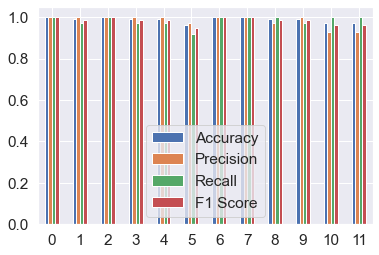

In [207]:
results.plot.bar(rot=0)

### AUC with RFE  

In [208]:
X =  df_norfs
y = df_nor['ckd']
# #Diviser les données (75% Apprentissage et 25% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# logistic regression
model1 = LogisticRegression(C=100.0,penalty="l2")
# knn
model2 = KNeighborsClassifier(6,p=2)
# SVM
model5 = SVC(C=10, gamma=0.0001,kernel='rbf',probability=True)

X =  df_fs
y = df['ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# NB
model6 = GaussianNB(var_smoothing=0.0001)
# RFC
model3 =RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators= 200, max_depth=5, criterion='gini')
# DTC
model4 = DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=3,splitter='best')


# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)
pred_prob6 = model6.predict_proba(X_test)




C:\Users\khalil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khalil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [209]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [210]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6)

0.9974533106960951 0.980899830220713 1.0 0.9499151103565365 0.9919354838709676 0.9966044142614602


##### The value for AUC ranges from 0 to 1. A model that has an AUC of 1 is able to perfectly classify observations into classes while a model that has an AUC of 0.5 does no better than a model that performs random guessing (RFC the best )

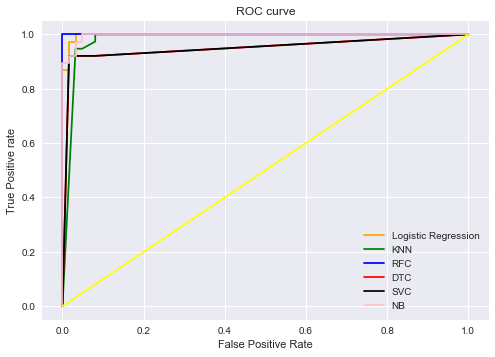

In [211]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='-',color='blue', label='RFC')
plt.plot(fpr4, tpr4, linestyle='-',color='red', label='DTC')
plt.plot(fpr4, tpr4, linestyle='-',color='black', label='SVC')
plt.plot(fpr6, tpr6, linestyle='-',color='pink', label='NB')
plt.plot(p_fpr, p_tpr, linestyle='-', color='yellow')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### It is evident from the plot that the AUC for the Random Forest Classification RFC curve is higher than all the models curve. Therefore, we can say that Random Forest Classification RFC did a better job of classifying the positive class in the dataset